 Welcome to the Heart Disease Case Study  

In [229]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)
#! pip install seaborn --upgrade
#pd.set_option('display.max_rows', 1000)

In [2]:
df_no_nans = pd.read_csv('heart_2022_no_nans.csv')
df_no_nans.head(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('heart_2022_with_nans.csv')
df.head(10)

#If you convert to a 1 / 0 , you can then almost check: 
#If you have 1 or more conditions, do you have a heart attack risk? 
#At what point, does your risk increase with one or more health conditions? 
#By converting the Yes/No to 1 and 0 - you can then use a SUM function to better understand how this changes. 



,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
5,Alabama,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,NaN,Yes,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.80,84.82,26.08,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
6,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 80 or older,1.65,62.60,22.96,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
7,Alabama,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 80 or older,1.63,73.48,27.81,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
8,Alabama,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,NaN,No,No,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Not at all (right now),NaN,"White only, Non-Hispanic",Age 75 to 79,1.70,NaN,NaN,No,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,No
9,Alabama,Female,Good,1.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,NaN,"White only, Non-Hispanic",Age 70 to 74,1.68,81.65,29.05,Yes,NaN,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [15]:
df.dropna(subset=["HadHeartAttack"], inplace=True)

In [16]:
df.dropna(subset=["HadAngina"], inplace=True)

In [17]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,428157.000000,429896.000000,433450.000000,410587.000000,397371.000000,390777.000000
mean,4.280224,4.358301,7.023101,1.702807,83.065914,28.522055
std,8.615406,8.353942,1.491750,0.107134,21.417849,6.543014
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.710000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [151]:
df.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1051
PhysicalHealthDays           10322
MentalHealthDays              8583
LastCheckupTime               7916
PhysicalActivities             949
SleepHours                    5029
RemovedTeeth                 10761
HadHeartAttack                   0
HadAngina                        0
HadStroke                      969
HadAsthma                     1364
HadSkinCancer                 2603
HadCOPD                       1688
HadDepressiveDisorder         2302
HadKidneyDisease              1471
HadArthritis                  2201
HadDiabetes                    758
DeafOrHardOfHearing          20072
BlindOrVisionDifficulty      20986
DifficultyConcentrating      23534
DifficultyWalking            23357
DifficultyDressingBathing    23301
DifficultyErrands            24986
SmokerStatus                 34644
ECigaretteUsage              34847
ChestScan                    54646
RaceEthnicityCategor

In [150]:
 df.nunique()

State                          54
Sex                             2
GeneralHealth                   5
PhysicalHealthDays             31
MentalHealthDays               31
LastCheckupTime                 4
PhysicalActivities              2
SleepHours                     24
RemovedTeeth                    4
HadHeartAttack                  2
HadAngina                       2
HadStroke                       2
HadAsthma                       2
HadSkinCancer                   2
HadCOPD                         2
HadDepressiveDisorder           2
HadKidneyDisease                2
HadArthritis                    2
HadDiabetes                     4
DeafOrHardOfHearing             2
BlindOrVisionDifficulty         2
DifficultyConcentrating         2
DifficultyWalking               2
DifficultyDressingBathing       2
DifficultyErrands               2
SmokerStatus                    4
ECigaretteUsage                 4
ChestScan                       2
RaceEthnicityCategory           5
AgeCategory   

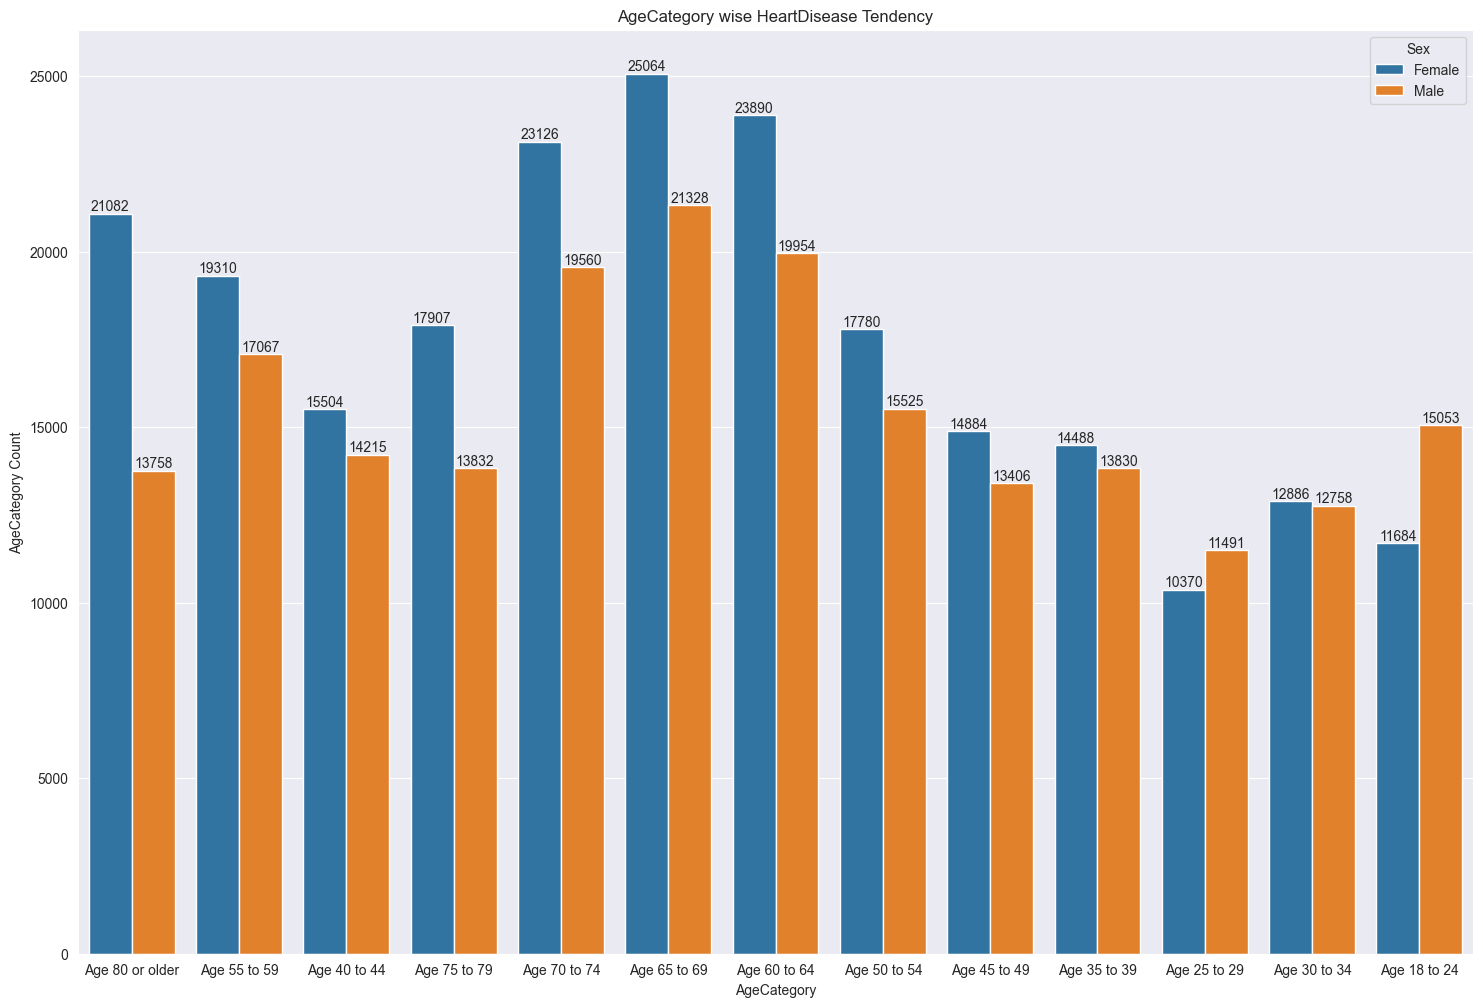

In [22]:
plt.figure(figsize=(18,12))
ax=sns.countplot(x='AgeCategory', hue='Sex', data=df)
ax.set_xlabel( "AgeCategory")
ax.set_ylabel( "AgeCategory Count")
ax.set_title(  "AgeCategory wise HeartDisease Tendency")
for i in ax.containers:
  ax.bar_label(i)
plt.show()

In [23]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos', 'HeartDisease'],
      dtype='object')

In [24]:
features=['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos', 'HeartDisease']

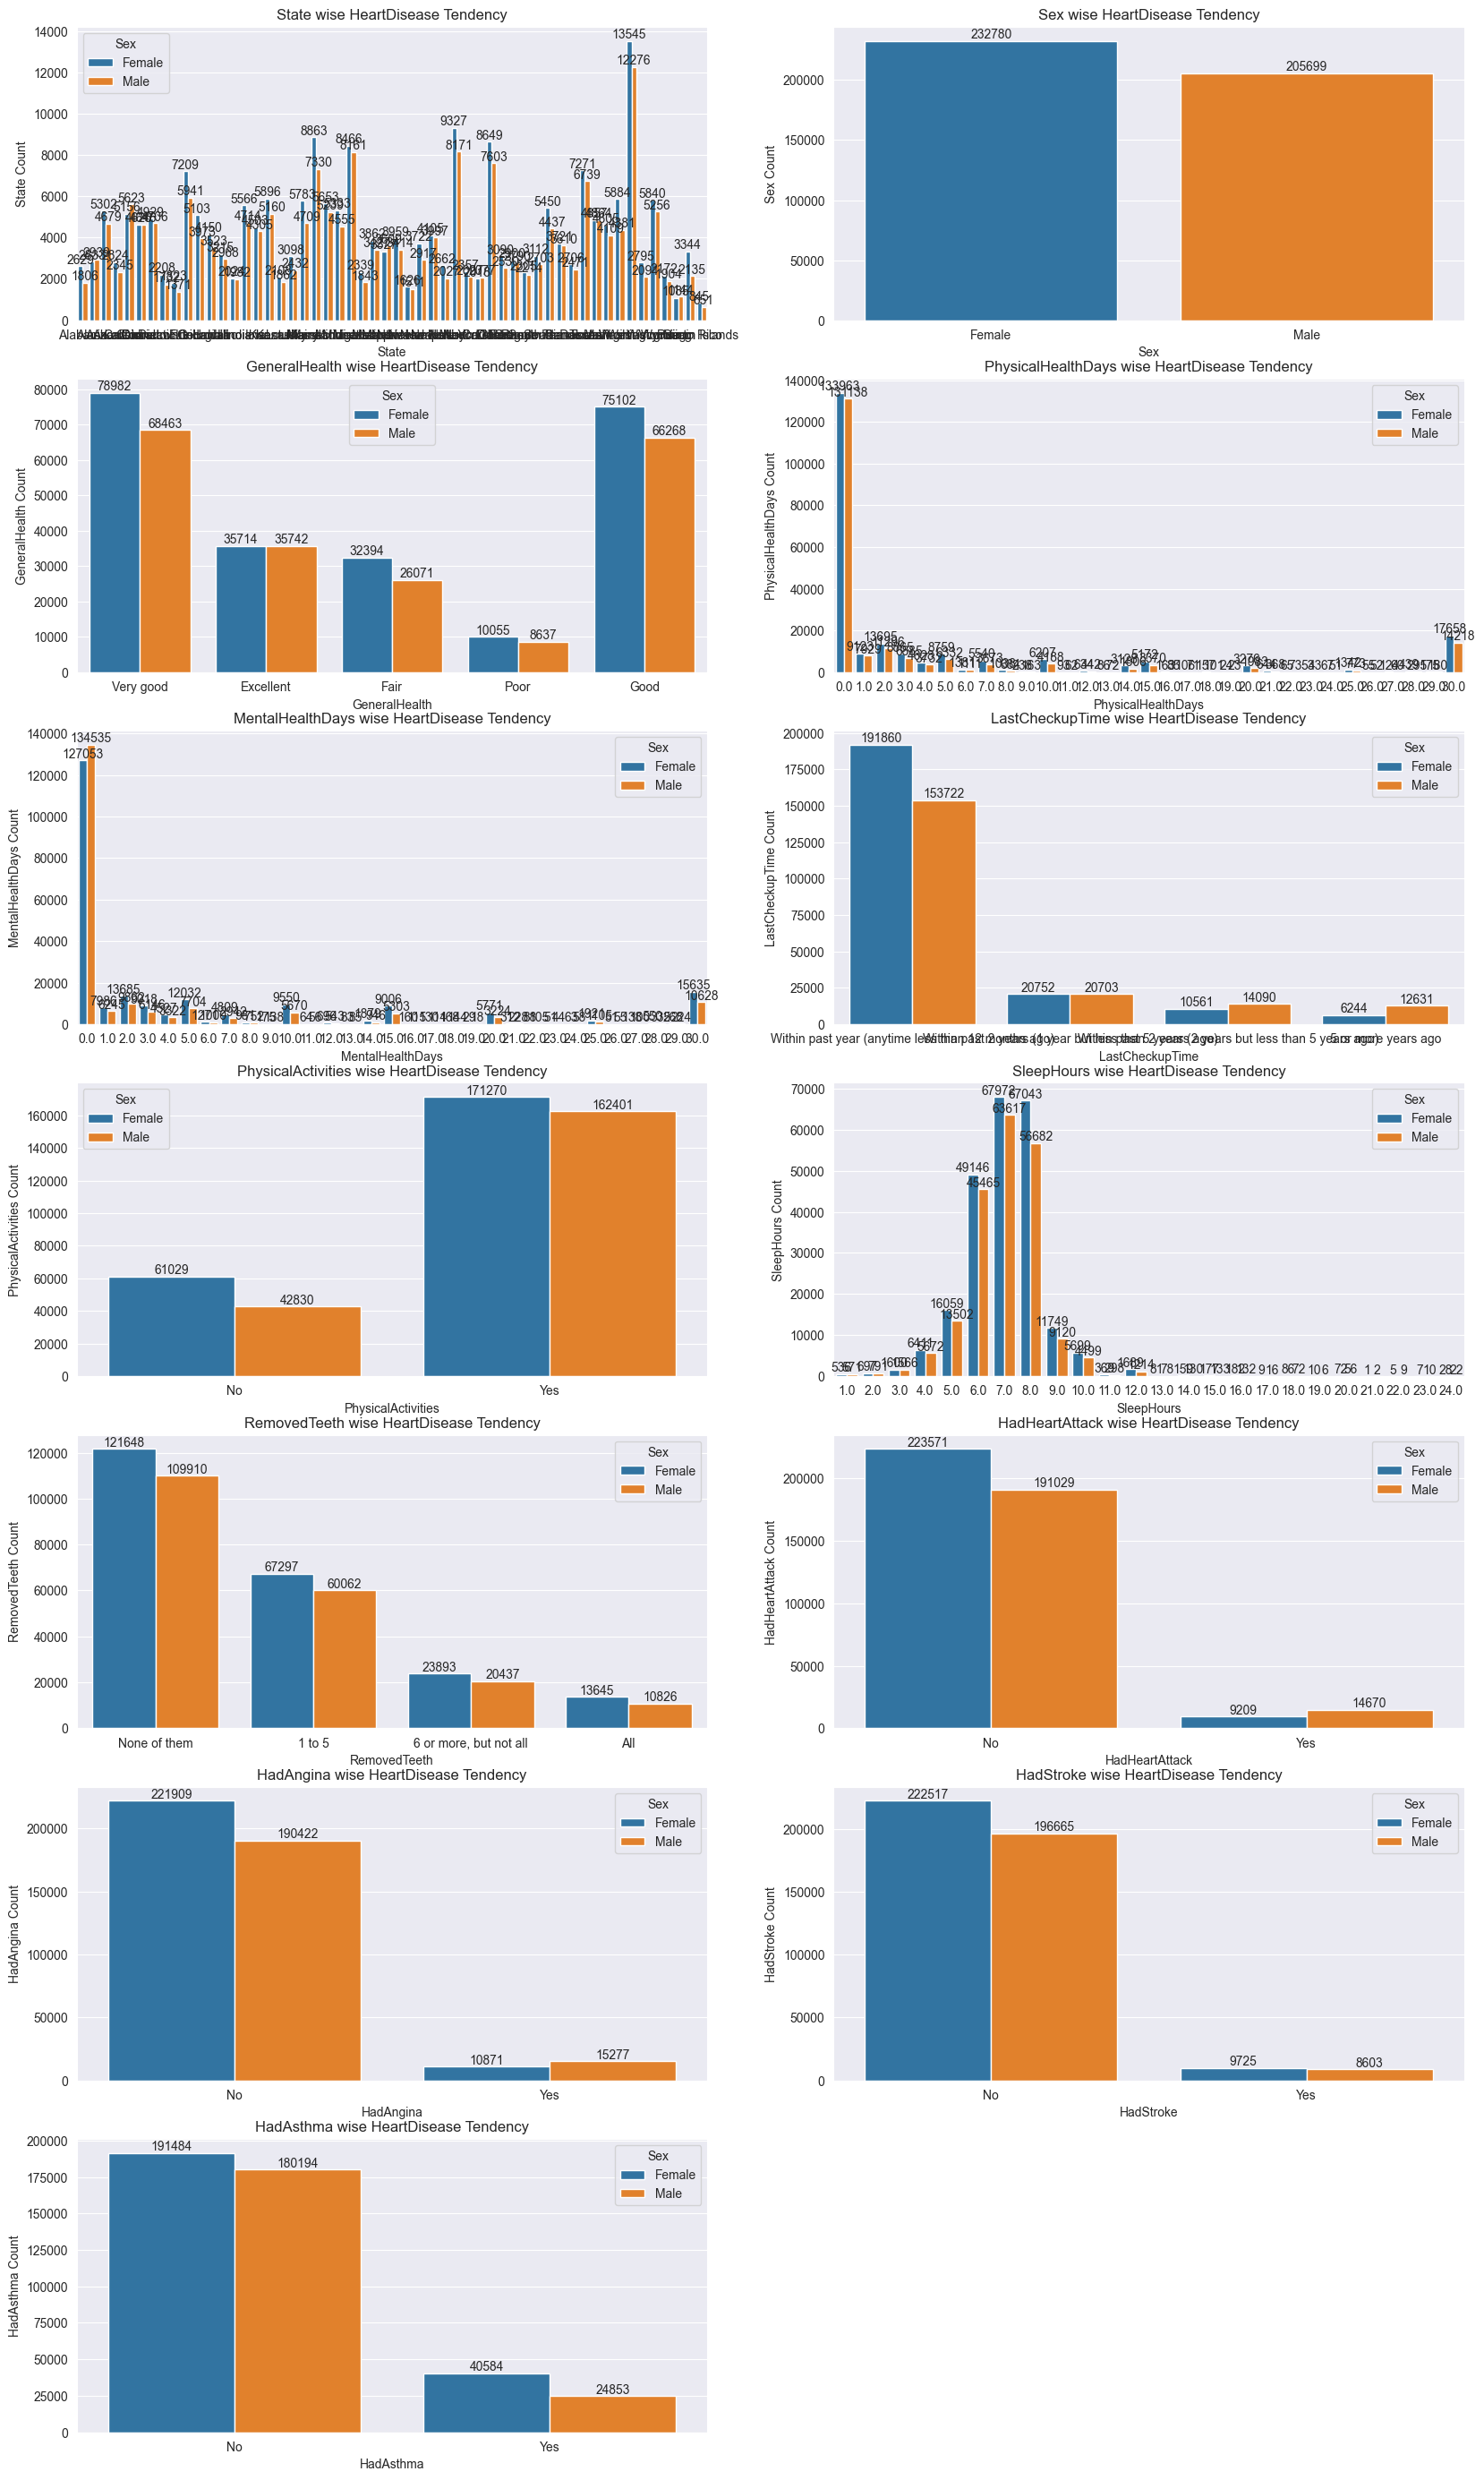

In [25]:
plt.figure(figsize=(20,40))
for i in range(1,14):

    plt.subplot(8,2,i)
    ax=sns.countplot(x=features[i-1],hue='Sex',data=df)
    #ax.set_xlabel(i)
    ax.set_ylabel( '{} Count'.format(features[i-1]))
    ax.set_title( '{} wise HeartDisease Tendency'.format(features[i-1]))
    for i in ax.containers:
        ax.bar_label(i)
plt.show()

In [5]:
#create a function to convert all yes/no to 1 and 0

def convert(value):
    if isinstance(value, str):
        if value.lower() == 'yes':
            return 1
        elif value.lower()=='no':
            return 0
    return value


In [6]:
t1 = df.head(100)
t1

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Alabama,Male,Poor,NaN,0.0,Within past year (anytime less than 12 months ...,Yes,12.0,NaN,No,No,No,No,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 80 or older,1.83,106.59,31.87,Yes,No,Yes,Yes,"Yes, received tetanus shot, but not Tdap",No,No
96,Alabama,Female,NaN,NaN,NaN,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Never smoked,Never used e-cigarettes in my entire life,NaN,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,No
97,Alabama,Female,Fair,0.0,0.0,Within past year (anytime less than 12 months ...,No,4.0,NaN,No,No,No,No,No,No,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 75 to 79,1.63,65.32,24.72,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
98,Alabama,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,NaN,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,Never smoked,Not at all (right now),Yes,"White only, Non-Hispanic",Age 60 to 64,1.80,83.91,25.80,No,Yes,No,No,NaN,No,No


In [7]:
import time

start_time = time.time()

t2 = df.applymap(convert)
t2
end_time = time.time()

elapsed_time = end_time - start_time
print(elapsed_time)

/var/folders/xb/2lg60z0s5lj67dq_vjj108r00000gn/T/ipykernel_56737/2818988126.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  t2 = df.applymap(convert)


2.5571889877319336


In [115]:
t3 = t2.reset_index()
t3[['index','State','HadHeartAttack','HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis']].groupby('index').sum()

,State,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis
index,,,,,,,,,,
0,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alabama,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Alabama,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Alabama,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
445128,Virgin Islands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
445129,Virgin Islands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [299]:
conditions = [
(t3['HadHeartAttack'] == 1),
(t3['HadAngina'] == 1),
(t3['HadHeartAttack'] == 0),
(t3['HadAngina'] == 0)]
output = ["1", "1", "0","0"]
t3['HeartDisease'] = np.select(conditions, output)        

In [303]:
t3['HadHeartAttack'].value_counts()

HadHeartAttack
0.0    416959
1.0     25108
Name: count, dtype: int64

In [304]:
t3['HadAngina'].value_counts()

HadAngina
0.0    414176
1.0     26551
Name: count, dtype: int64

In [305]:
t3[['HeartDisease', 'HadHeartAttack', 'HadAngina']].value_counts().reset_index()

,HeartDisease,HadHeartAttack,HadAngina,count
0,0,0.0,0.0,400360
1,1,0.0,1.0,14240
2,1,1.0,0.0,11971
3,1,1.0,1.0,11908


In [148]:
t3['HeartDisease'].value_counts()

HeartDisease
0    405381
1     39751
Name: count, dtype: int64

In [149]:
No_HeartDisease  = (405381/444315) * 100
HeartDisease =  (39751/444315) * 100

print('HeartDisease present are {} percent of total people\'s of datasets'.format(HeartDisease))
print('No HeartDisease are {} percent of total people\'s of datasets'.format(No_HeartDisease))

HeartDisease present are 8.946580691626437 percent of total people's of datasets
No HeartDisease are 91.2372978630026 percent of total people's of datasets


In [53]:
#'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis'
    
t3['counted'] = t3['HadAsthma'] + t3['HadSkinCancer'] + t3['HadCOPD'] + t3['HadDepressiveDisorder'] + t3['HadKidneyDisease'] + t3['HadArthritis'] 
 
print(t3)
 


         index           State     Sex GeneralHealth  PhysicalHealthDays  \
0            0         Alabama  Female     Very good                 0.0   
1            1         Alabama  Female     Excellent                 0.0   
2            2         Alabama  Female     Very good                 2.0   
3            3         Alabama  Female     Excellent                 0.0   
4            4         Alabama  Female          Fair                 2.0   
...        ...             ...     ...           ...                 ...   
445127  445127  Virgin Islands  Female          Good                 0.0   
445128  445128  Virgin Islands  Female     Excellent                 2.0   
445129  445129  Virgin Islands  Female          Poor                30.0   
445130  445130  Virgin Islands    Male     Very good                 0.0   
445131  445131  Virgin Islands    Male     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
0       

In [309]:
t3

,index,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartDisease,HeartDiseasePresence
0,0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0.0,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,Never smoked,Not at all (right now),0.0,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,0.0,0.0,1.0,0.0,"Yes, received tetanus shot but not sure what type",0.0,0,0,0
1,1,Alabama,Female,Excellent,0.0,0.0,NaN,0.0,6.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Never smoked,Never used e-cigarettes in my entire life,0.0,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,0.0,0.0,0.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,0,0,0
2,2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,1.0,5.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Never smoked,Never used e-cigarettes in my entire life,0.0,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,0.0,0.0,0.0,0.0,NaN,0.0,1,0,0
3,3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,1.0,7.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,1.0,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,0.0,0.0,1.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0,0,0
4,4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,1.0,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Never smoked,Never used e-cigarettes in my entire life,1.0,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,1.0,0.0,0.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,1.0,6.0,None of them,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Never smoked,Never used e-cigarettes in my entire life,1.0,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,1.0,0.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,1,0,0
445128,445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,1.0,7.0,None of them,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Never smoked,Never used e-cigarettes in my entire life,0.0,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,0.0,1.0,1.0,0.0,"Yes, received tetanus shot but not sure what type",0.0,0,0,0
445129,445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,0.0,5.0,1 to 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,0.0,0.0,0.0,Current smoker - now smokes every day,Use them some days,NaN,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,0.0,0.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,0,0,0
445130,445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0.0,5.0,None of them,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Never smoked,Never used e-cigarettes in my entire life,1.0,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,0.0,1.0,1.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,1,1,1


In [130]:
# We want to compare the number of individuals with Heart Disease with respect to male/female and 
# also factoring in to account of the General Health

#t3[['Sex','GeneralHealth','index','HeartDiseasePresence']]

# We can use a IF Statement and Boolean Logic to help us create this column
# Previously, we hve created a boolean outputf or 1 or 0 if the individual has a heart condition 
t3['HeartDiseasePresence'] = np.where(np.logical_or(t3['HadHeartAttack']>=1, t3['HadAngina']>=1),1,0)

tmp = t3[t3['HeartDiseasePresence']==1][['HadHeartAttack','HadAngina','HeartDiseasePresence']]
tmp['HadHeartAttack'].value_counts()
# def convert(value):
#     if isinstance(value, str):
#         if value.lower() == 'yes':
#             return 1
#         elif value.lower()=='no':
#             return 0
#     return value


#df[df['HeartDisease'] == float("NaN")][['HeartDisease', 'HadHeartAttack', 'HadAngina']]

HadHeartAttack
1.0    25108
0.0    14240
Name: count, dtype: int64

In [145]:
tmp['HeartDiseasePresence'].value_counts()

HeartDiseasePresence
1    39751
Name: count, dtype: int64

In [300]:
conditions = [
(t3['HadHeartAttack'] == 1),
(t3['HadAngina'] == 1),
(t3['HadHeartAttack'] == 0),
(t3['HadAngina'] == 0)]
output = ["1", "1", "0","0"]
t3['HeartDisease'] = np.select(conditions, output) 

In [301]:
t3

,index,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartDisease,HeartDiseasePresence
0,0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0.0,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,Never smoked,Not at all (right now),0.0,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,0.0,0.0,1.0,0.0,"Yes, received tetanus shot but not sure what type",0.0,0,0,0
1,1,Alabama,Female,Excellent,0.0,0.0,NaN,0.0,6.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Never smoked,Never used e-cigarettes in my entire life,0.0,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,0.0,0.0,0.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,0,0,0
2,2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,1.0,5.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Never smoked,Never used e-cigarettes in my entire life,0.0,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,0.0,0.0,0.0,0.0,NaN,0.0,1,0,0
3,3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,1.0,7.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,1.0,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,0.0,0.0,1.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0,0,0
4,4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,1.0,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Never smoked,Never used e-cigarettes in my entire life,1.0,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,1.0,0.0,0.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,1.0,6.0,None of them,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Never smoked,Never used e-cigarettes in my entire life,1.0,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,1.0,0.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,1,0,0
445128,445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,1.0,7.0,None of them,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Never smoked,Never used e-cigarettes in my entire life,0.0,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,0.0,1.0,1.0,0.0,"Yes, received tetanus shot but not sure what type",0.0,0,0,0
445129,445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,0.0,5.0,1 to 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,0.0,0.0,0.0,Current smoker - now smokes every day,Use them some days,NaN,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,0.0,0.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,0,0,0
445130,445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0.0,5.0,None of them,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Never smoked,Never used e-cigarettes in my entire life,1.0,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,0.0,1.0,1.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,1,1,1


In [135]:
t3['HeartDiseasePresence'].value_counts()

HeartDiseasePresence
0    405381
1     39751
Name: count, dtype: int64

In [142]:
t3['HadHeartAttack'].value_counts()

HadHeartAttack
0.0    416959
1.0     25108
Name: count, dtype: int64

In [143]:
t3['HadAngina'].value_counts()

HadAngina
0.0    414176
1.0     26551
Name: count, dtype: int64

In [144]:
tmp

,HadHeartAttack,HadAngina,HeartDiseasePresence
5,1.0,0.0,1
22,0.0,1.0,1
26,1.0,1.0,1
28,0.0,1.0,1
31,1.0,1.0,1
...,...,...,...
445103,1.0,0.0,1
445107,1.0,1.0,1
445109,1.0,NaN,1
445115,1.0,0.0,1


In [156]:
heart_attack_angina_poorhealth = t3[((t3['HadHeartAttack']==1)&(t3['GeneralHealth']=='Poor'))\
                         |((t3['HadAngina']==1)&(t3['GeneralHealth']=='Poor'))]

m_gh = heart_attack_angina_poorhealth[heart_attack_angina['Sex'] == 'Male']
f_gh = heart_attack_angina_poorhealth[heart_attack_angina_poorhealth['Sex'] == 'Female']
num_individuals_with_poor_health = len(t3[t3['GeneralHealth'] == 'Poor'])
#Len is short hand in Python for Length of your List

m_gh_pct = len(m_gh)/num_individuals_with_poor_health
f_gh_pct = len(f_gh)/num_individuals_with_poor_health

 
# Our Denominator will be the number of individuals who have poor health 

In [190]:
num_individuals_with_poor_health

19741

In [157]:
f_gh_pct

0.1461425459703156

In [158]:
m_gh_pct

0.16559444810293297

In [ ]:
# Male with poor general health have 2% higher risk of heart disease than female with poor health.

In [146]:
t3['LastCheckupTime'].unique()

array(['Within past year (anytime less than 12 months ago)', nan,
       'Within past 2 years (1 year but less than 2 years ago)',
       'Within past 5 years (2 years but less than 5 years ago)',
       '5 or more years ago'], dtype=object)

In [167]:
#Compare the individuals with heart disease with respect to male/female and
#also factoring in to the account of the frequency of the check up schedule
#the individuals with less regular body checkup would lead to higher risk of heart disease?

heart_attack_angina_checkuptime5 = t3[((t3['HadHeartAttack']==1)&(t3['LastCheckupTime']=='5 or more years ago'))\
                         |((t3['HadAngina']==1)&(t3['LastCheckupTime']=='5 or more years ago'))]

m_ct5 = heart_attack_angina_checkuptime5[heart_attack_angina_checkuptime5['Sex'] == 'Male']
f_ct5 = heart_attack_angina_checkuptime5[heart_attack_angina_checkuptime5['Sex'] == 'Female']
num_individuals_with_checkuptime5 = len(t3[t3['LastCheckupTime'] == '5 or more years ago'])

In [183]:
num_individuals_with_checkuptime5

19079

In [175]:
m_ct5_pct = len(m_ct5)/num_individuals_with_checkuptime5
m_ct5_pct

0.0196551181927774

In [176]:
f_ct5_pct = len(f_ct5)/num_individuals_with_checkuptime5
f_ct5_pct

0.010168247811730174

In [ ]:
#male did body check 5 or more years ago has slightly higher proportion (0.95%) of heart disease than female with the similar
#check up schedule.

In [171]:
heart_attack_angina_checkuptime1 = t3[((t3['HadHeartAttack']==1)&(t3['LastCheckupTime']=='Within past year (anytime less than 12 months ago)'))\
                         |((t3['HadAngina']==1)&(t3['LastCheckupTime']=='Within past year (anytime less than 12 months ago)'))]

m_ct1 = heart_attack_angina_checkuptime1[heart_attack_angina_checkuptime1['Sex'] == 'Male']
f_ct1 = heart_attack_angina_checkuptime1[heart_attack_angina_checkuptime1['Sex'] == 'Female']
num_individuals_with_checkuptime1 = len(t3[t3['LastCheckupTime'] == 'Within past year (anytime less than 12 months ago)'])

In [182]:
num_individuals_with_checkuptime1

350944

In [172]:
m_ct1_pct = len(m_ct1)/num_individuals_with_checkuptime1
m_ct1_pct

0.05979016595240266

In [173]:
f_ct1_pct = len(f_ct1)/num_individuals_with_checkuptime1
f_ct1_pct

0.04318352785629616

In [ ]:
#male did body check within past year also have higher proportion (1.66%) of heart disease than female.

In [ ]:
#higher proportion of heart disease for both male (4%) and female (3%) if they have body check more often(within past year)
#since they might have the necessicity to check up yearly.

In [174]:
t3['PhysicalActivities'].unique()

array([ 0.,  1., nan])

In [330]:
# Want to compare the people with heart disease with more physical activities and those with less activities

heart_attack_angina_pa = t3[((t3['HadHeartAttack']==1)&(t3['PhysicalActivities']==0))\
                         |((t3['HadAngina']==1)&(t3['PhysicalActivities']==0))]

m_pa = heart_attack_angina_pa[heart_attack_angina_pa['Sex'] == 'Male']
f_pa = heart_attack_angina_pa[heart_attack_angina_pa['Sex'] == 'Female']
num_individuals_with_0_physicalactivities = len(t3[t3['PhysicalActivities'] == 0])
#Len is short hand in Python for Length of your List

m_pa_pct = len(m_pa)/num_individuals_with_0_physicalactivities
f_pa_pct = len(f_pa)/num_individuals_with_0_physicalactivities

m_pa_pct

0.07037002253944402

In [331]:
f_pa_pct

0.06874530428249437

In [ ]:
# It looks like that male is slightly higher chance (0.1%) of getting heart disease than female when both of the gender have done none of the physical activities.

In [315]:
# Whenever I debug, I always check what I am filtering first
# Quotes can be used interchangeable between either singel quotes or double quotes
# When we are filtering for a NUMBER, we do not include quotes. 

t3['PhysicalActivities'].unique()
t3[t3['PhysicalActivities']==0.0]

,index,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartDisease,HeartDiseasePresence
0,0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0.0,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,Never smoked,Not at all (right now),0.0,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,0.0,0.0,1.0,0.0,"Yes, received tetanus shot but not sure what type",0.0,0,0,0
1,1,Alabama,Female,Excellent,0.0,0.0,NaN,0.0,6.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Never smoked,Never used e-cigarettes in my entire life,0.0,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,0.0,0.0,0.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,0,0,0
5,5,Alabama,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,0.0,7.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,Never smoked,Never used e-cigarettes in my entire life,0.0,"White only, Non-Hispanic",Age 80 or older,1.80,84.82,26.08,0.0,0.0,0.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0,1,1
7,7,Alabama,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,0.0,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Never smoked,Never used e-cigarettes in my entire life,1.0,"White only, Non-Hispanic",Age 80 or older,1.63,73.48,27.81,0.0,0.0,1.0,1.0,"Yes, received tetanus shot but not sure what type",0.0,0,0,0
10,10,Alabama,Female,Fair,8.0,9.0,Within past year (anytime less than 12 months ...,0.0,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0.0,0.0,0.0,0.0,0.0,Never smoked,Never used e-cigarettes in my entire life,1.0,"White only, Non-Hispanic",Age 80 or older,1.60,74.84,29.23,0.0,0.0,1.0,1.0,"Yes, received tetanus shot but not sure what type",0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445112,445112,Virgin Islands,Male,Excellent,0.0,7.0,Within past year (anytime less than 12 months ...,0.0,4.0,None of them,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,Never smoked,Not at all (right now),0.0,"Black only, Non-Hispanic",Age 18 to 24,1.65,49.90,18.30,1.0,0.0,0.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,0,0,0
445115,445115,Virgin Islands,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,0.0,6.0,1 to 5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Current smoker - now smokes every day,Never used e-cigarettes in my entire life,1.0,"Black only, Non-Hispanic",Age 55 to 59,1.80,118.84,36.54,1.0,1.0,1.0,0.0,"Yes, received tetanus shot but not sure what type",0.0,0,1,1
445122,445122,Virgin Islands,Male,Fair,30.0,1.0,Within past year (anytime less than 12 months ...,0.0,6.0,"6 or more, but not all",0.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,"No, pre-diabetes or borderline diabetes",0.0,0.0,0.0,0.0,0.0,0.0,Former smoker,Never used e-cigarettes in my entire life,1.0,"White only, Non-Hispanic",Age 70 to 74,1.78,70.31,22.24,0.0,0.0,1.0,NaN,"Yes, received tetanus shot but not sure what type",0.0,1,0,0
445129,445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,0.0,5.0,1 to 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,0.0,0.0,0.0,Current smoker - now smokes every day,Use them some days,NaN,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,0.0,0.0,0.0,"No, did not receive any tetanus shot in the pa..

In [191]:
num_individuals_with_0_physicalactivities 

0

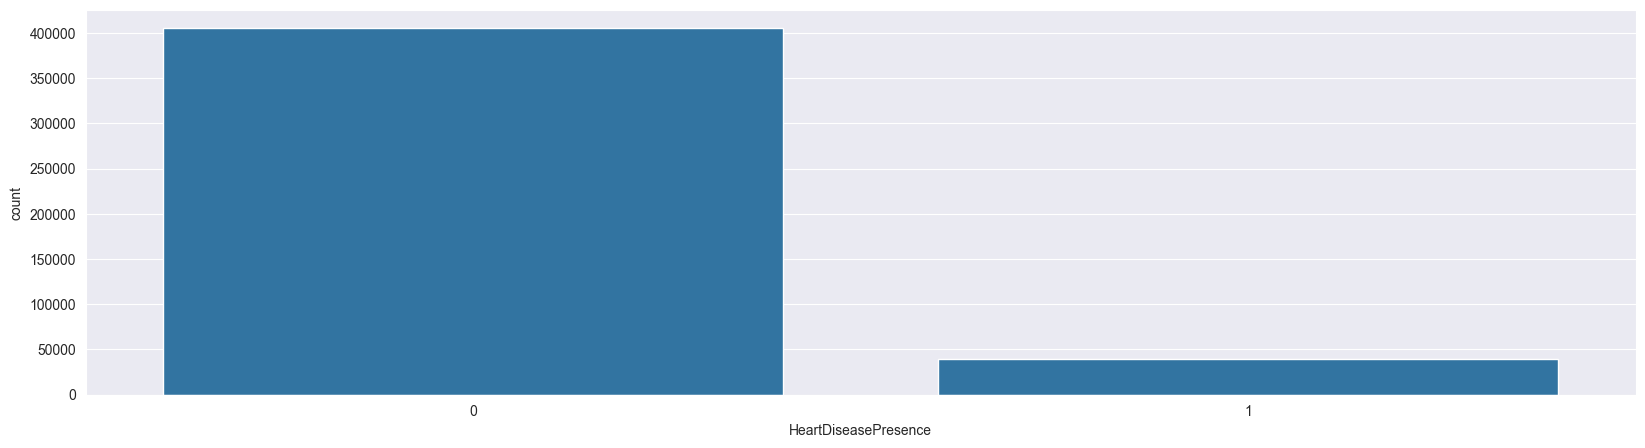

In [231]:
sns.countplot(data=t3, x="HeartDiseasePresence")
plt.show()

In [218]:
t3["HeartDiseasePresence"].value_counts()

HeartDiseasePresence
0    405381
1     39751
Name: count, dtype: int64

In [208]:
t3.columns

Index(['index', 'State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos', 'HeartDisease', 'HeartDiseasePresence'],
      dtype='object')

In [209]:
df_heartdisease = t3[t3['HeartDiseasePresence']==1][['index', 'State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos']]

df_heartdisease.head()

,index,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
5,5,Alabama,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,0.0,7.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,Never smoked,Never used e-cigarettes in my entire life,0.0,"White only, Non-Hispanic",Age 80 or older,1.80,84.82,26.08,0.0,0.0,0.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0
22,22,Alabama,Female,Fair,30.0,0.0,Within past year (anytime less than 12 months ...,1.0,7.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"White only, Non-Hispanic",Age 80 or older,NaN,47.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,26,Alabama,Female,Fair,23.0,3.0,Within past year (anytime less than 12 months ...,1.0,8.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,1.0,"Black only, Non-Hispanic",Age 65 to 69,1.68,105.23,37.45,1.0,0.0,1.0,1.0,"Yes, received tetanus shot but not sure what type",0.0,1
28,28,Alabama,Female,Good,0.0,20.0,Within past year (anytime less than 12 months ...,0.0,8.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Current smoker - now smokes every day,Not at all (right now),0.0,"White only, Non-Hispanic",Age 65 to 69,1.60,56.70,22.14,0.0,0.0,1.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,0
31,31,Alabama,Male,Fair,30.0,0.0,Within past year (anytime less than 12 months ...,1.0,4.0,NaN,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0,1.0,0.0,0.0,1.0,0.0,0.0,Never smoked,Never used e-cigarettes in my entire life,1.0,"White only, Non-Hispanic",Age 75 to 79,1.88,86.18,24.39,1.0,1.0,1.0,1.0,"Yes, received tetanus shot but not sure what type",0.0,0


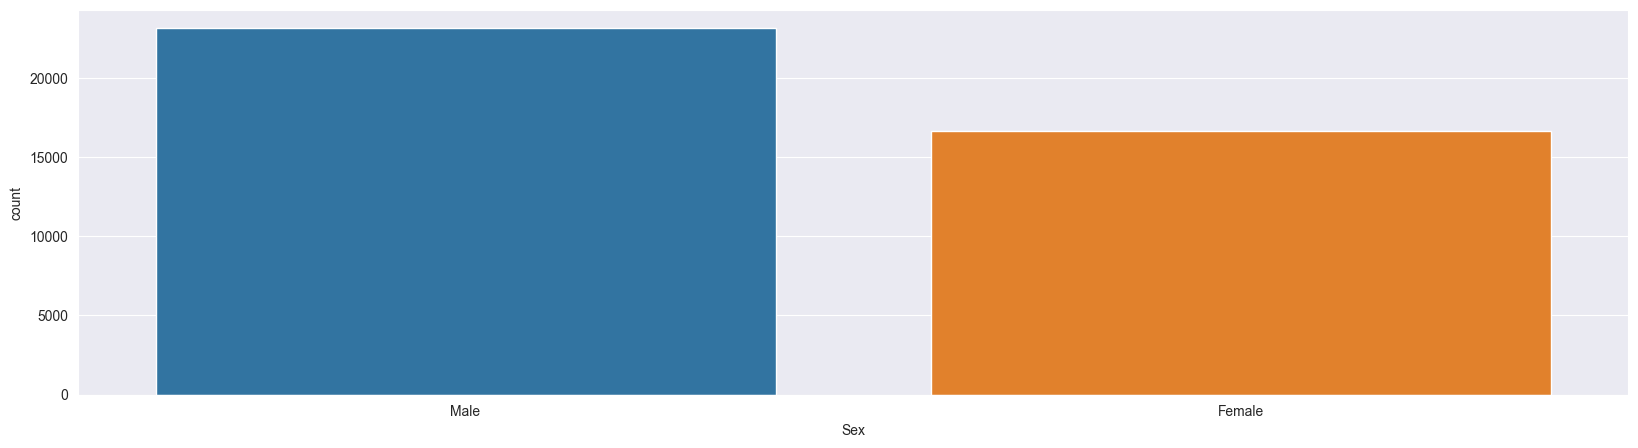

In [232]:
sns.countplot(data=df_heartdisease, x="Sex", hue="Sex")
plt.show()

In [219]:
df_heartdisease["Sex"].value_counts()

Sex
Male      23137
Female    16614
Name: count, dtype: int64

In [226]:
m_ct1 = heart_attack_angina_checkuptime1[heart_attack_angina_checkuptime1['Sex'] == 'Male']
f_ct1 = heart_attack_angina_checkuptime1[heart_attack_angina_checkuptime1['Sex'] == 'Female']
num_individuals_with_checkuptime1 = len(t3[t3['LastCheckupTime'] == 'Within past year (anytime less than 12 months ago)'])


m_hd = df_heartdisease[df_heartdisease['Sex'] == 'Male']
f_hd = df_heartdisease[df_heartdisease["Sex"] == 'Female']
num_individuals_with_heartdisease = len(t3[t3["HeartDiseasePresence"] == 1])

m_hd_pct = len(m_hd) / num_individuals_with_heartdisease
f_hd_pct = len(f_hd) / num_individuals_with_heartdisease

m_hd_pct 

0.5820482503584815

In [228]:
f_hd_pct

0.41795174964151843

In [227]:
 num_individuals_with_heartdisease  

39751

In [ ]:
#for this dataset, the male is around 16% higher chance of getting heartdisease than female.

In [192]:
t3['SleepHours'].unique() 

array([ 8.,  6.,  5.,  7.,  9.,  4., 10.,  1., 12., nan, 18.,  3.,  2.,
       11., 16., 15., 13., 14., 20., 23., 17., 24., 22., 19., 21.])

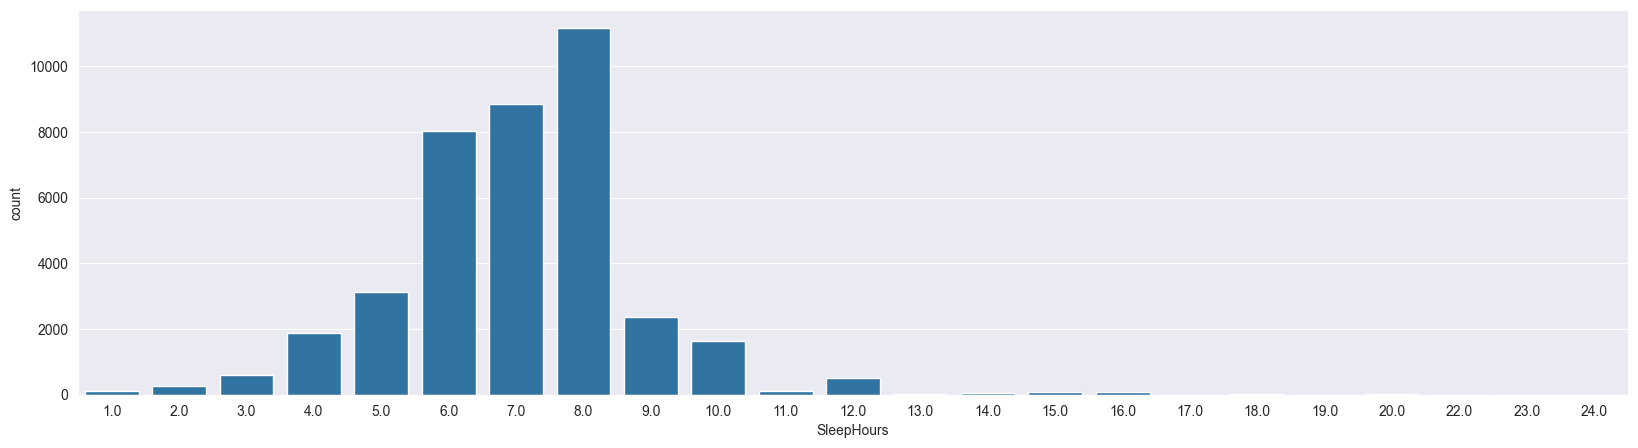

In [214]:
sns.countplot(data=df_heartdisease, x="SleepHours")
plt.show()

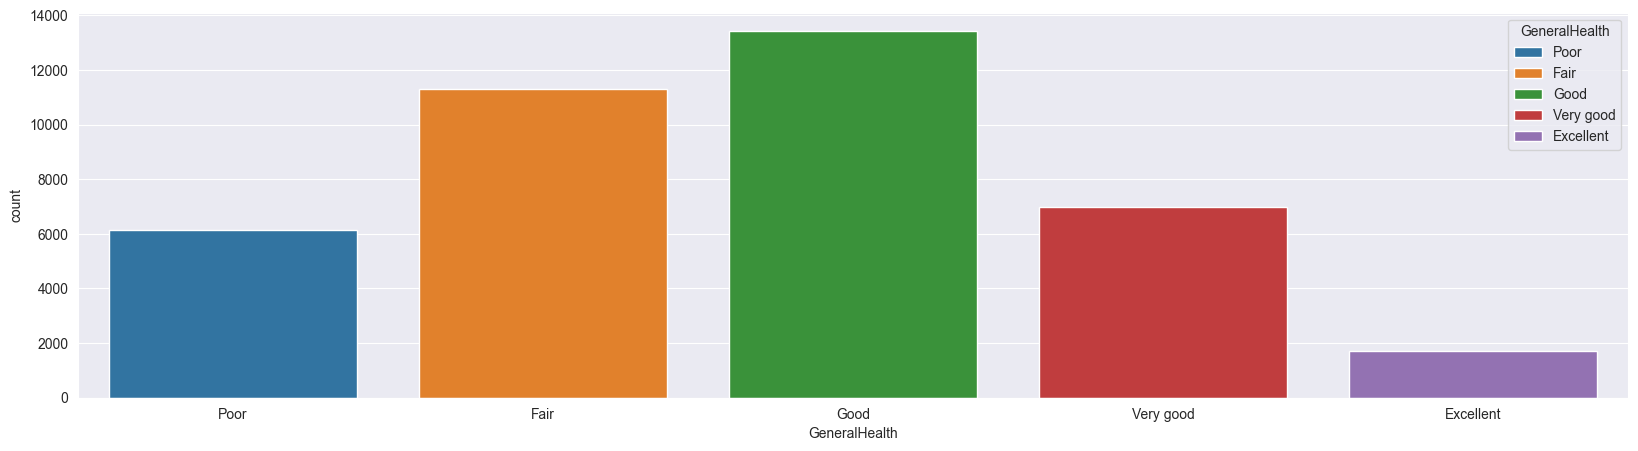

In [233]:
sns.countplot(data=df_heartdisease, x="GeneralHealth", hue="GeneralHealth")
plt.show()

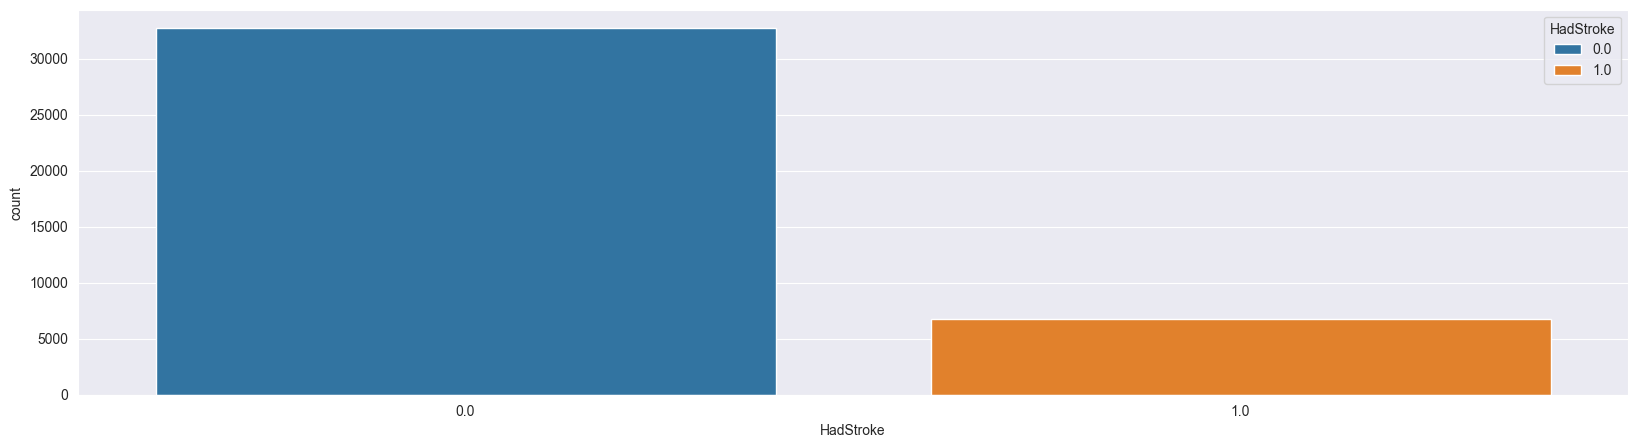

In [238]:
sns.countplot(data=df_heartdisease, x="HadStroke", hue="HadStroke")
plt.show()

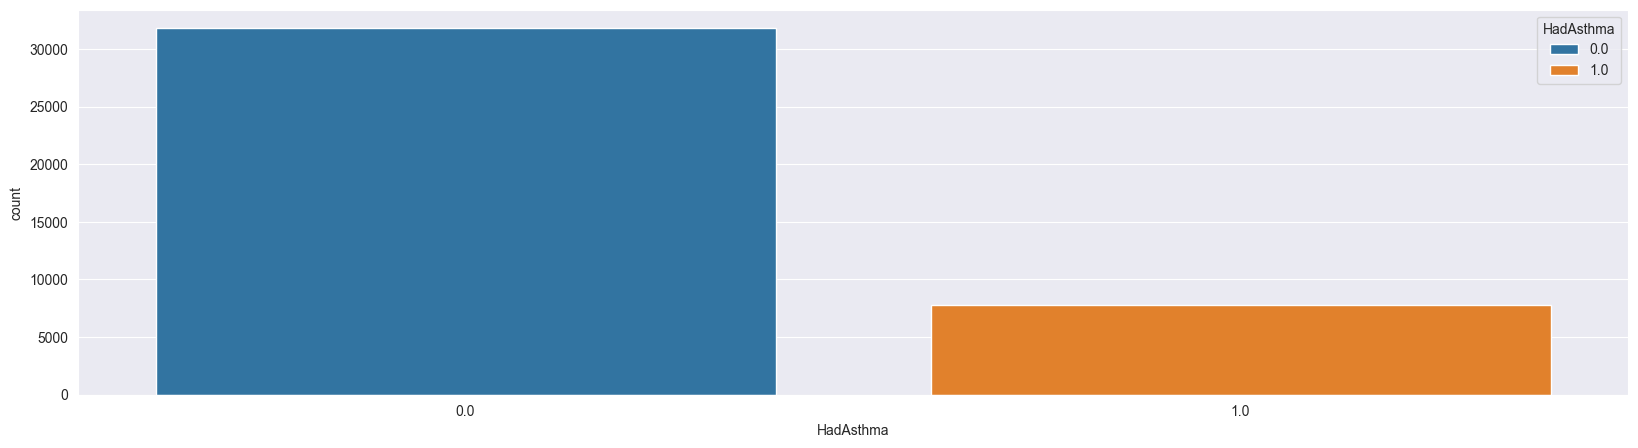

In [237]:
sns.countplot(data=df_heartdisease, x="HadAsthma", hue="HadAsthma")
plt.show()

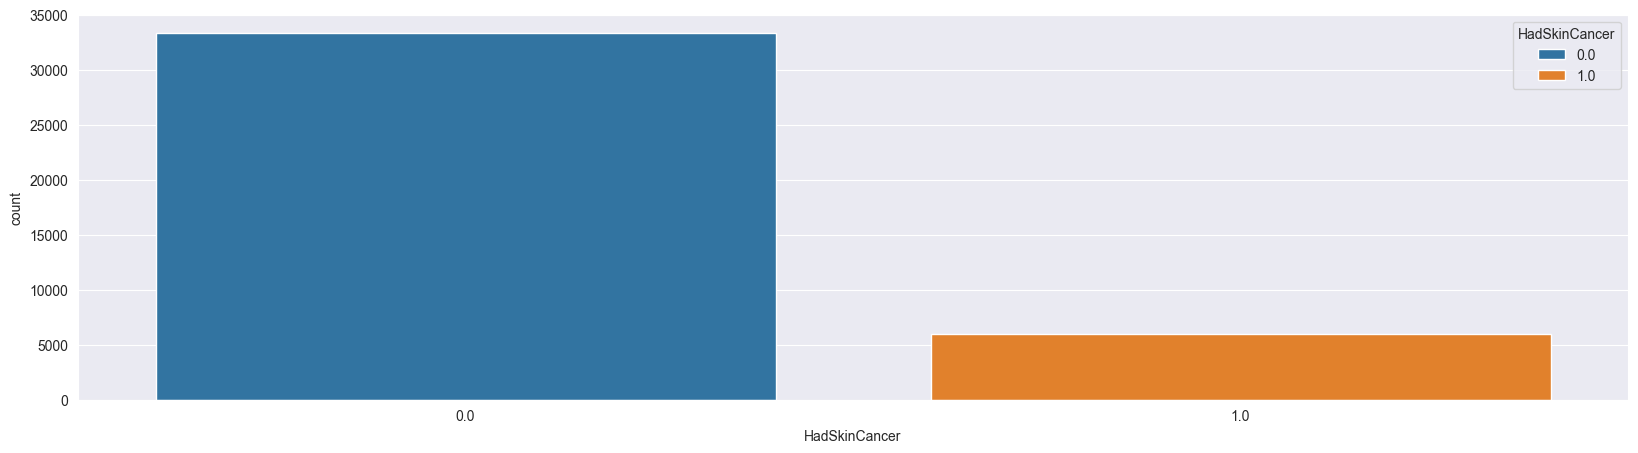

In [239]:
sns.countplot(data=df_heartdisease, x="HadSkinCancer", hue="HadSkinCancer")
plt.show()

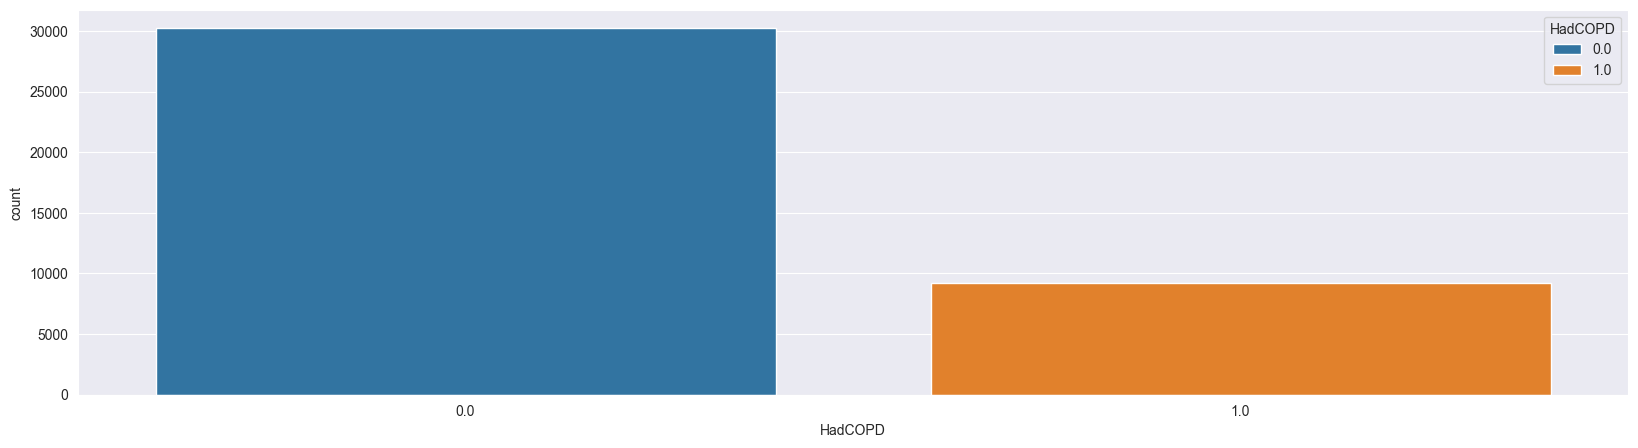

In [240]:
sns.countplot(data=df_heartdisease, x="HadCOPD", hue="HadCOPD")
plt.show()

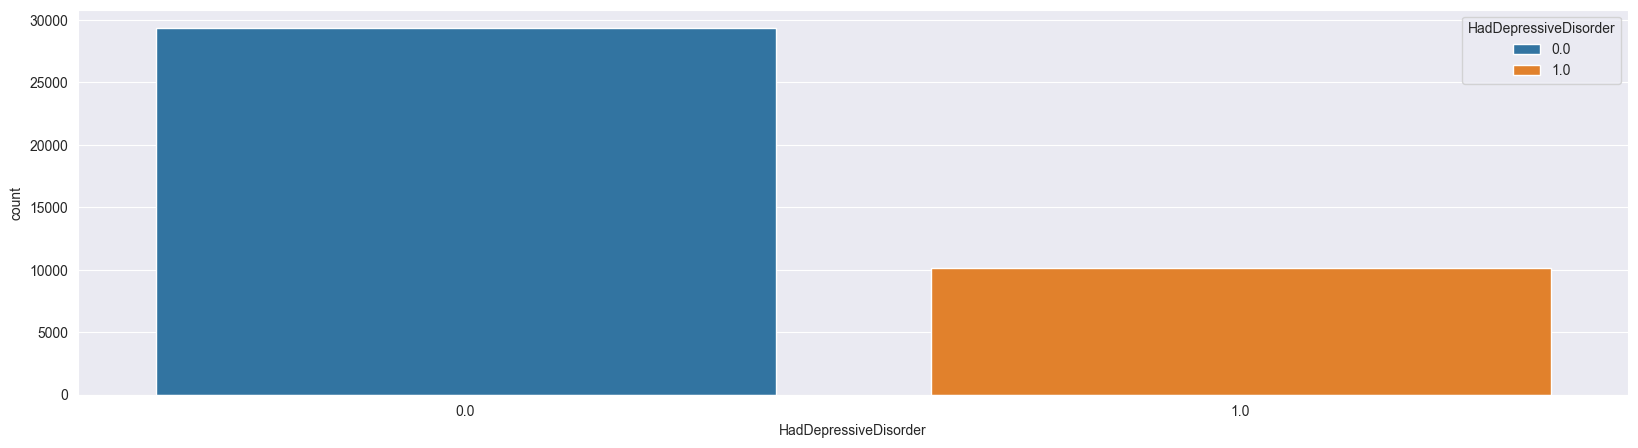

In [241]:
sns.countplot(data=df_heartdisease, x="HadDepressiveDisorder", hue="HadDepressiveDisorder")
plt.show()

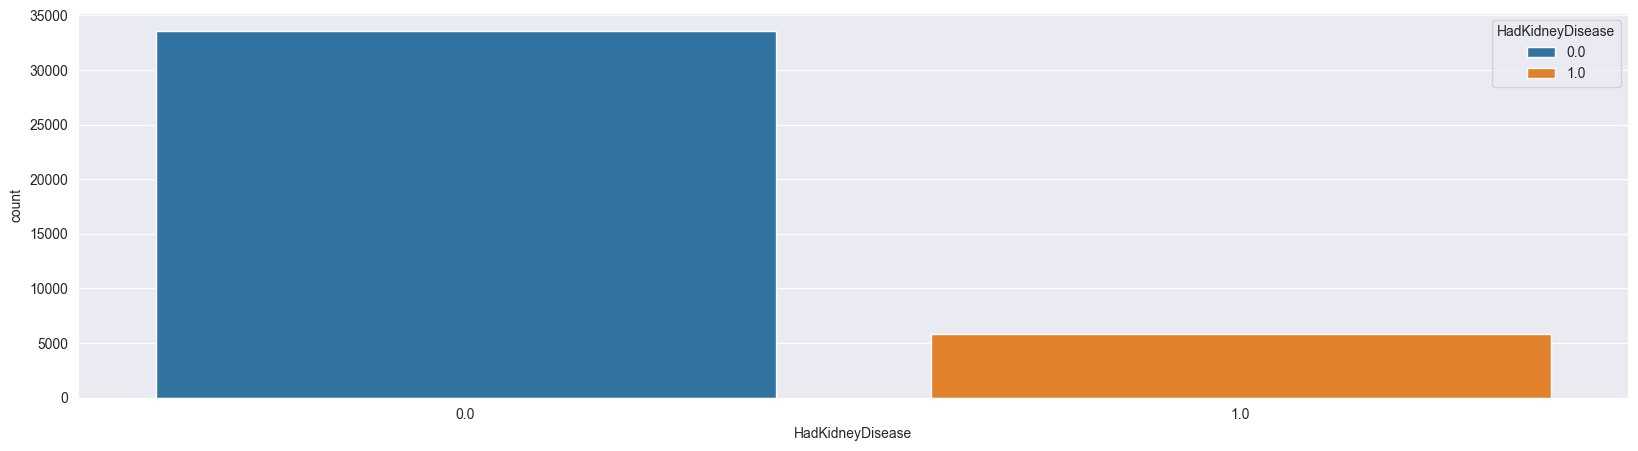

In [242]:
sns.countplot(data=df_heartdisease, x="HadKidneyDisease", hue="HadKidneyDisease")
plt.show()

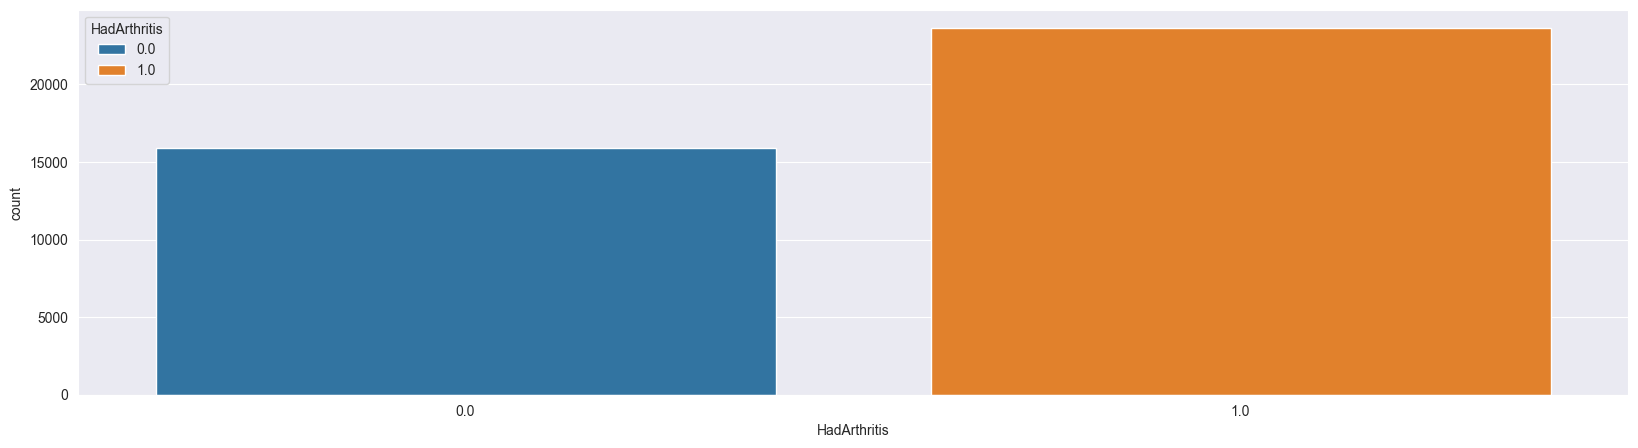

In [244]:
sns.countplot(data=df_heartdisease, x="HadArthritis", hue="HadArthritis")
plt.show()

#More than half of the individuals with heart diseases also had arthritis. 
#Research if the arthritis relates to heart disease.

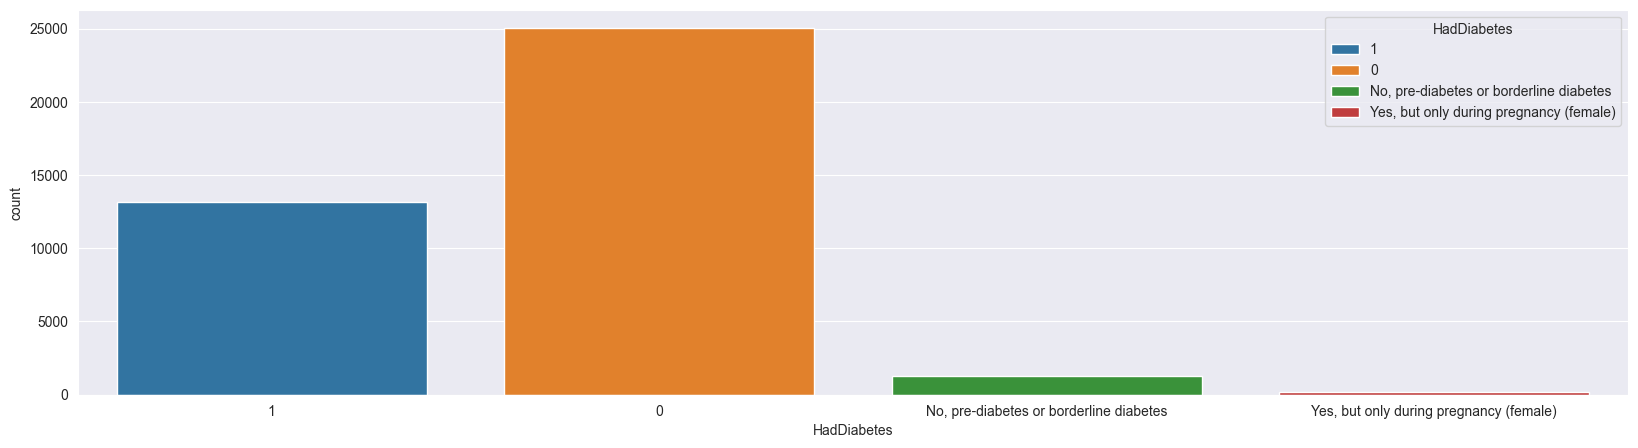

In [245]:
sns.countplot(data=df_heartdisease, x="HadDiabetes", hue="HadDiabetes")
plt.show()

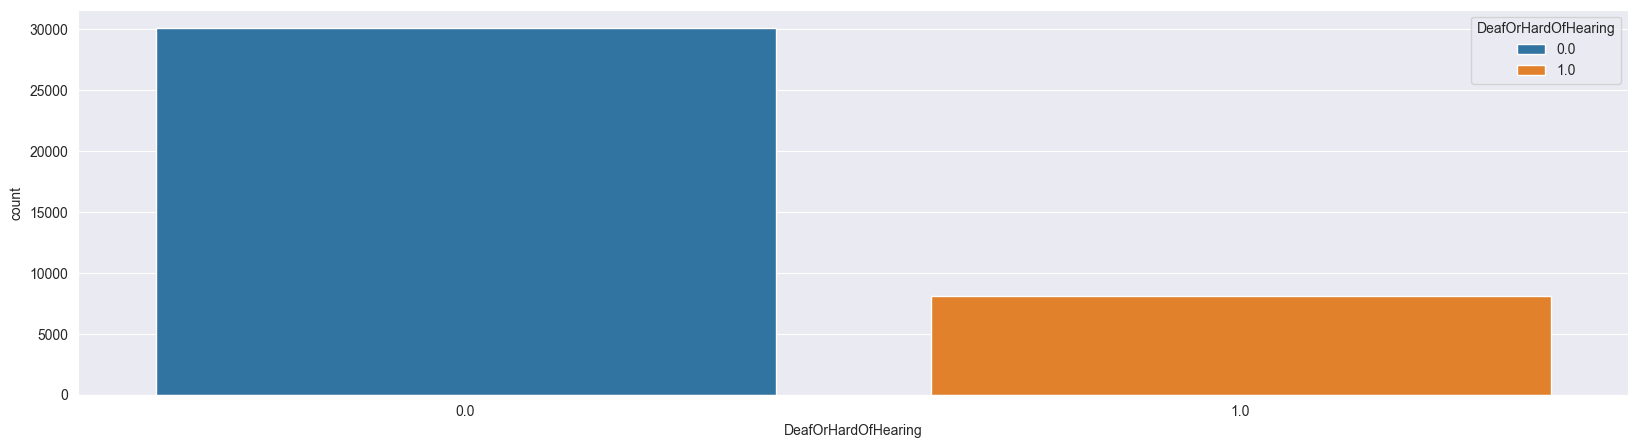

In [246]:
sns.countplot(data=df_heartdisease, x="DeafOrHardOfHearing", hue="DeafOrHardOfHearing")
plt.show()

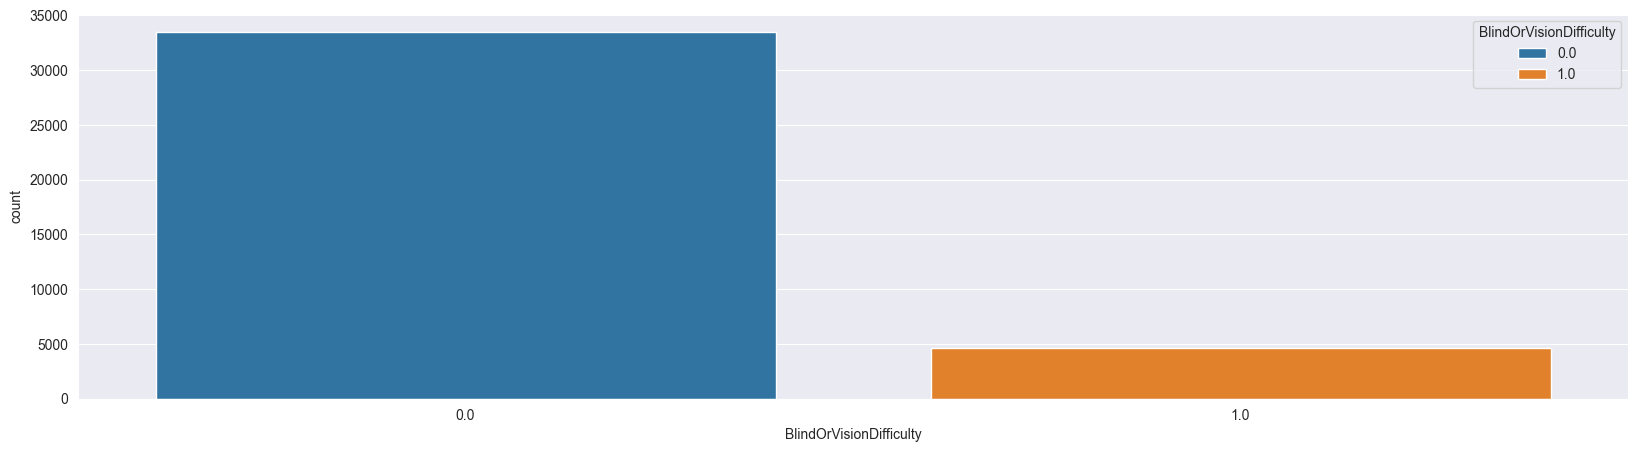

In [247]:
sns.countplot(data=df_heartdisease, x="BlindOrVisionDifficulty", hue="BlindOrVisionDifficulty")
plt.show()

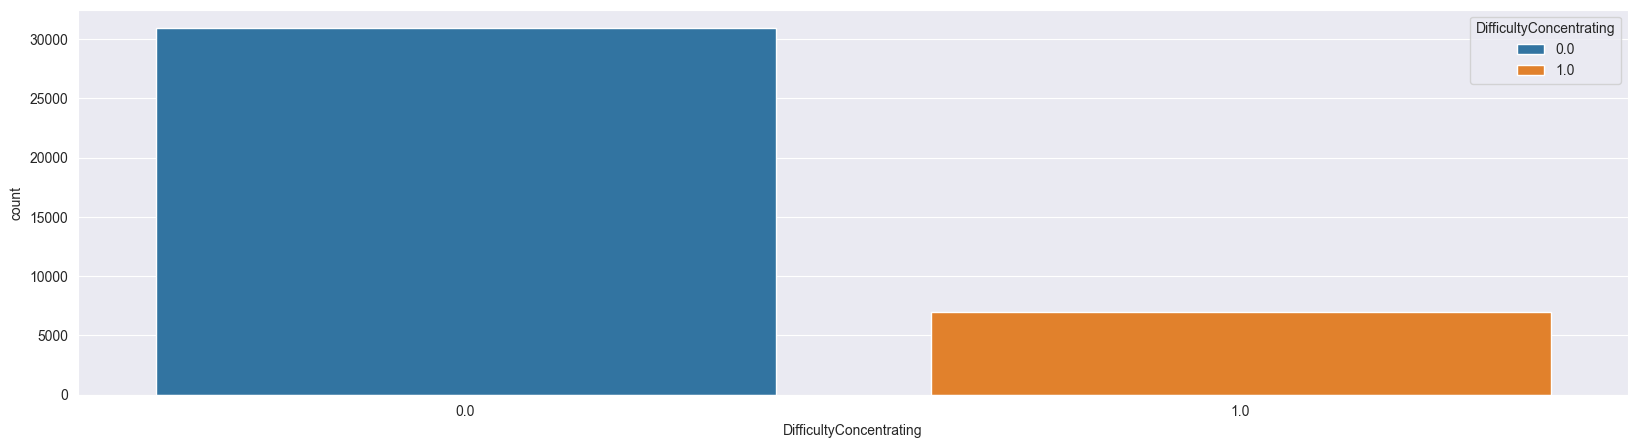

In [248]:
sns.countplot(data=df_heartdisease, x="DifficultyConcentrating", hue="DifficultyConcentrating")
plt.show()

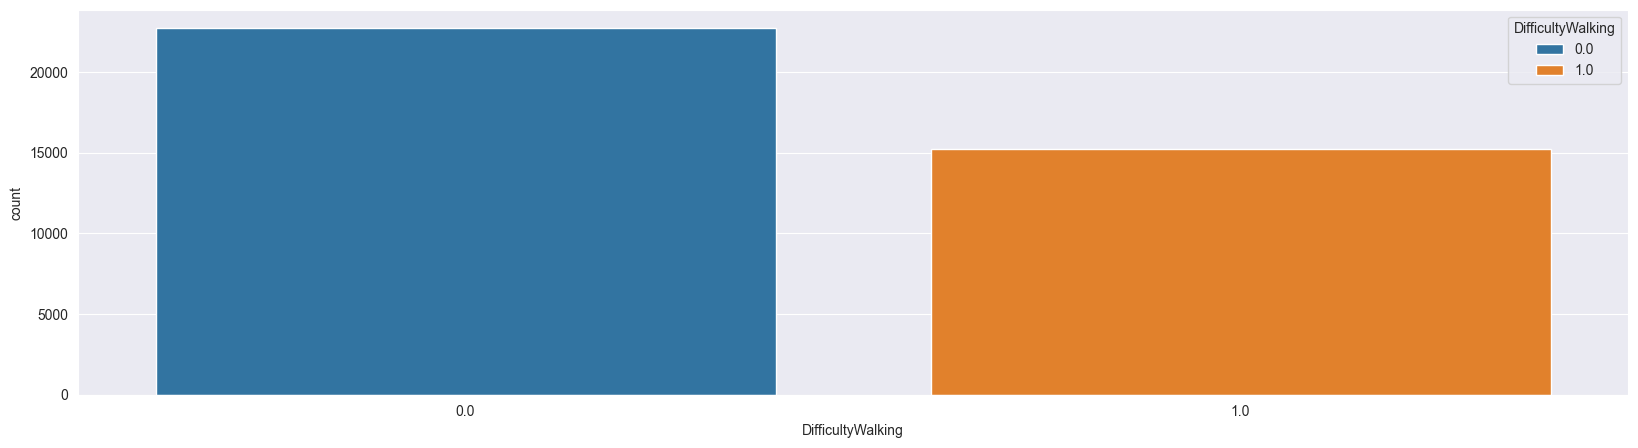

In [249]:
sns.countplot(data=df_heartdisease, x="DifficultyWalking", hue="DifficultyWalking")
plt.show()

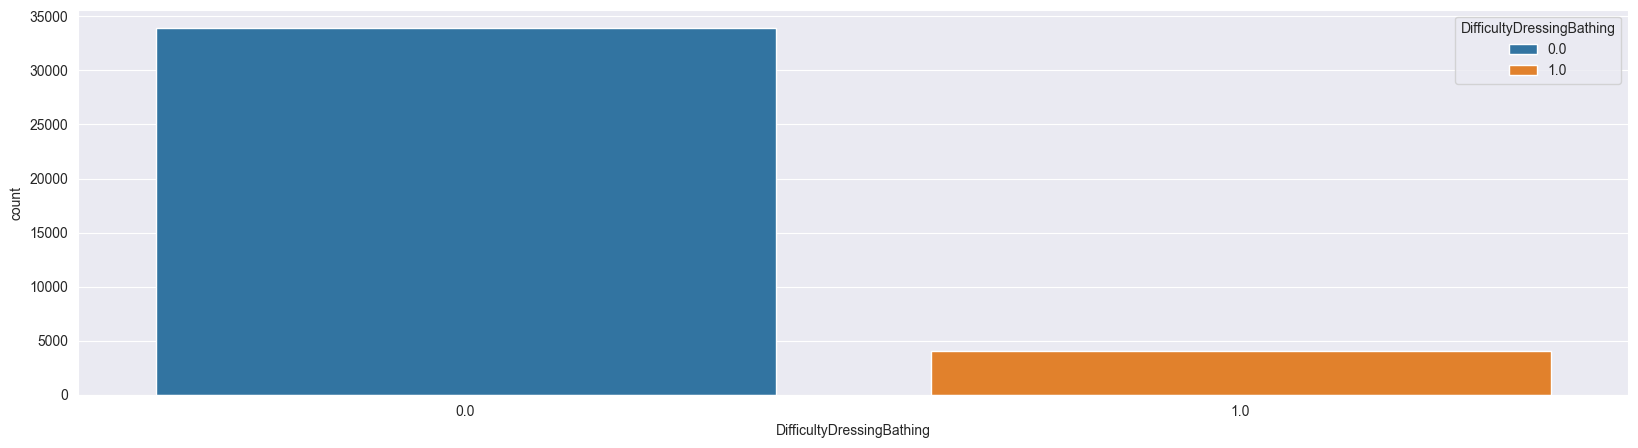

In [251]:
sns.countplot(data=df_heartdisease, x="DifficultyDressingBathing", hue="DifficultyDressingBathing")
plt.show()

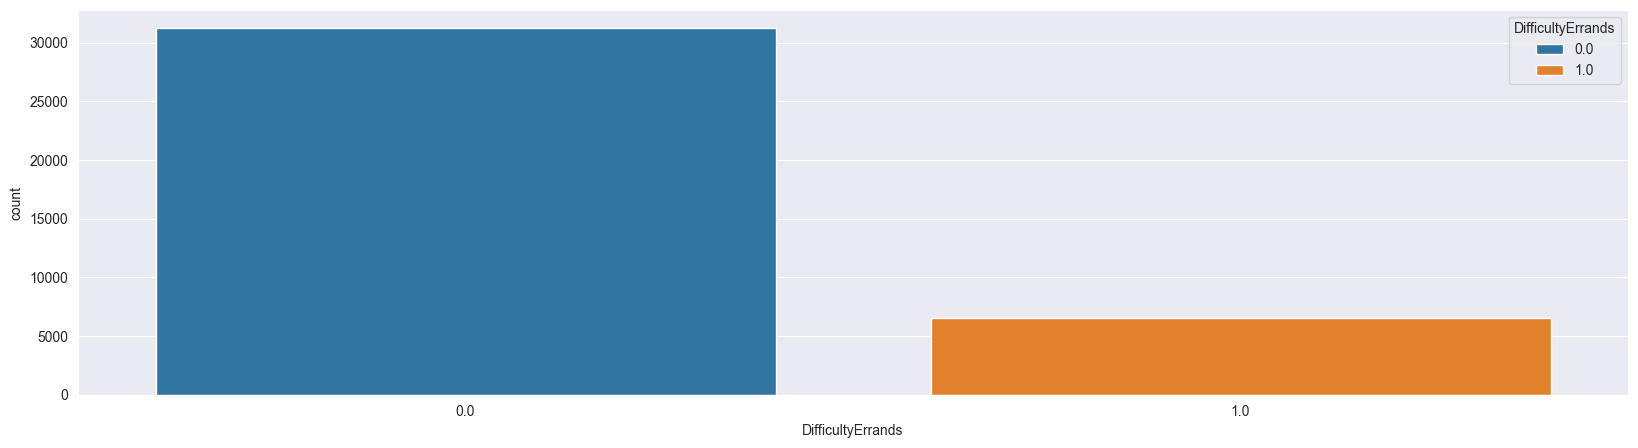

In [252]:
sns.countplot(data=df_heartdisease, x="DifficultyErrands", hue="DifficultyErrands")
plt.show()

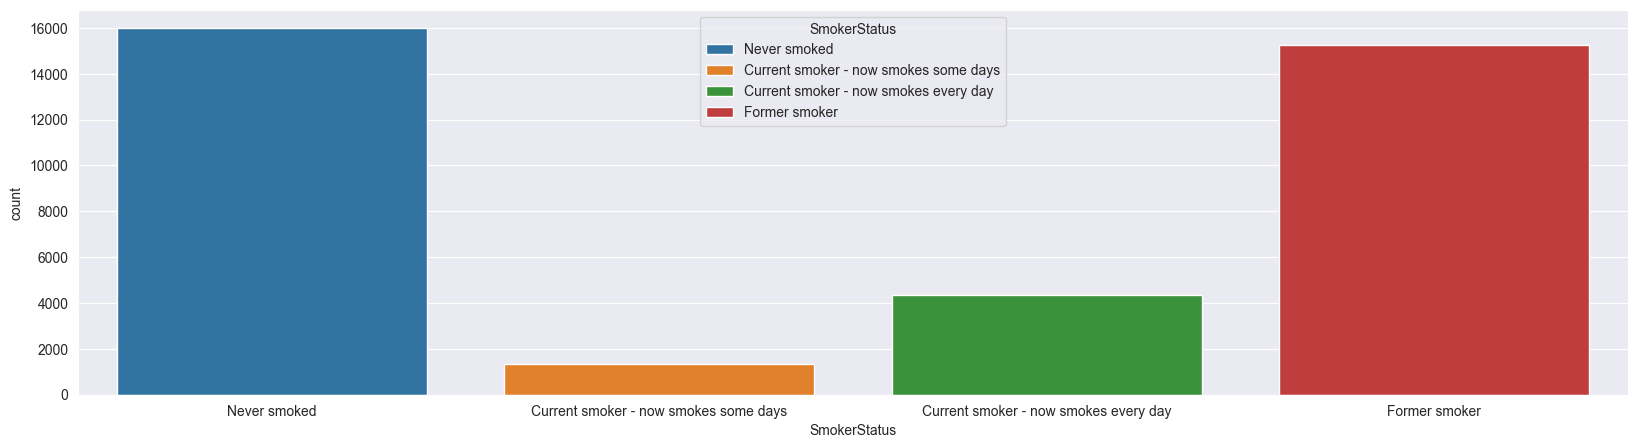

In [253]:
sns.countplot(data=df_heartdisease, x="SmokerStatus", hue="SmokerStatus")
plt.show()

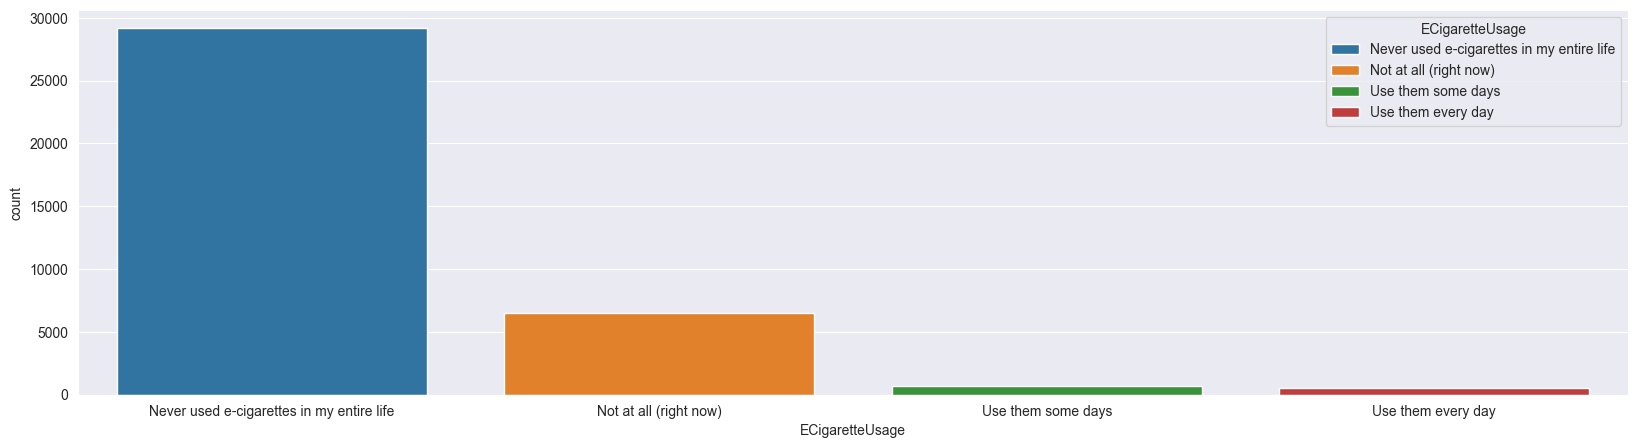

In [254]:
sns.countplot(data=df_heartdisease, x="ECigaretteUsage", hue="ECigaretteUsage")
plt.show()

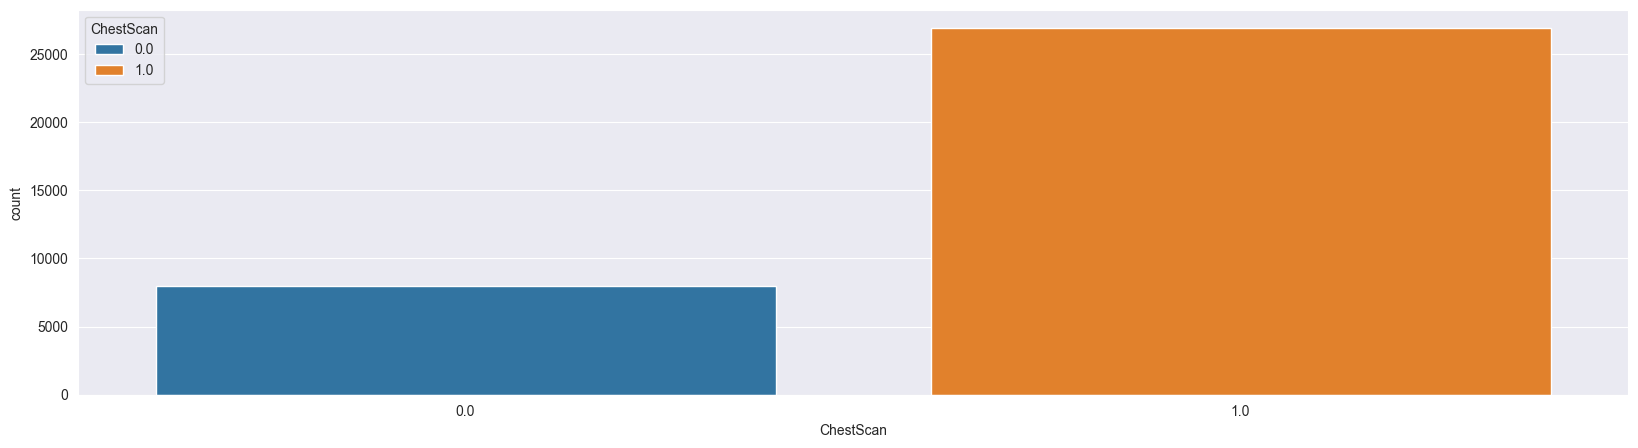

In [255]:
sns.countplot(data=df_heartdisease, x="ChestScan", hue="ChestScan")
plt.show()

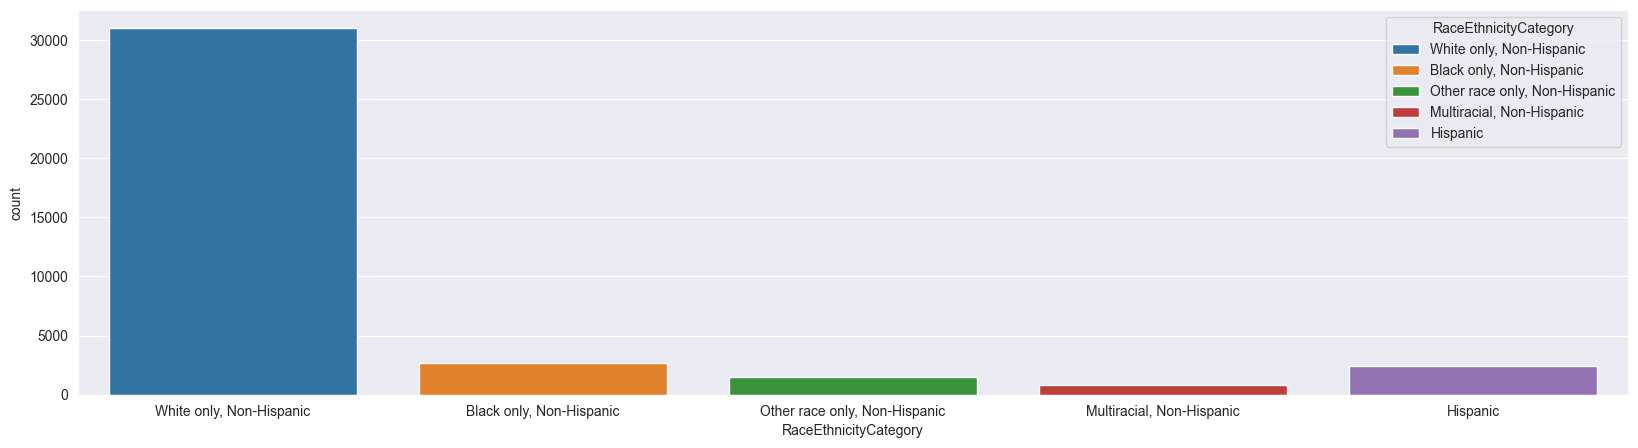

In [256]:
sns.countplot(data=df_heartdisease, x="RaceEthnicityCategory", hue="RaceEthnicityCategory")
plt.show()

In [ ]:
#this dataset shows that white people have higher chance of getting heart disease than other ethnicities.

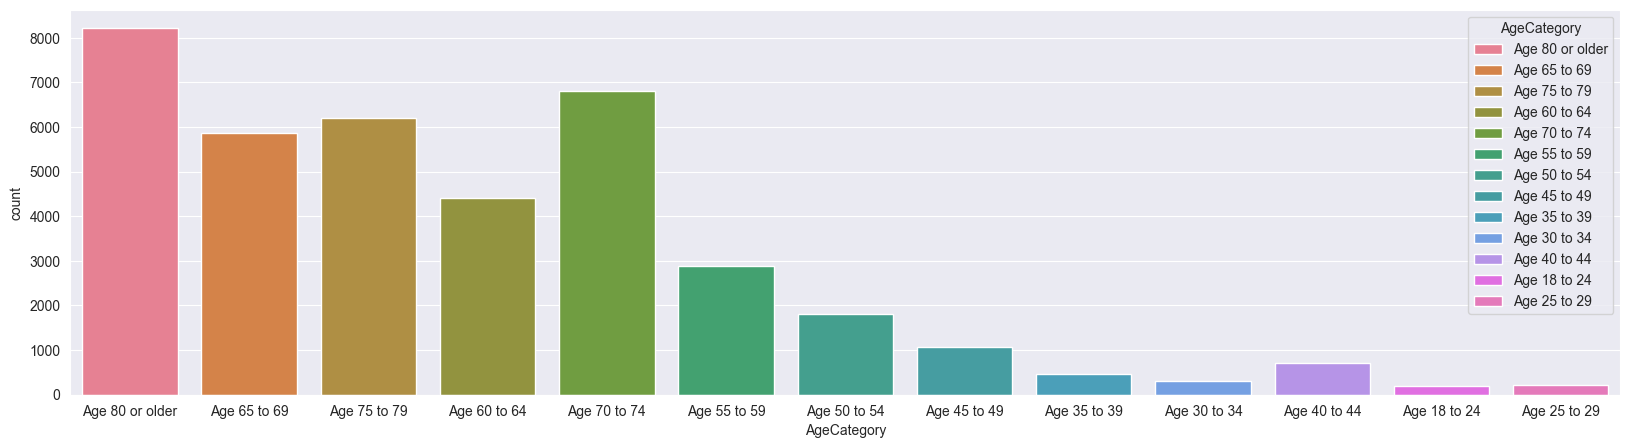

In [263]:
sns.countplot(data=df_heartdisease, x="AgeCategory", hue="AgeCategory")
plt.show()

#Looks like the higher chance of getting heart disease is after age 60.
#how can I set the barplot descending by order

In [285]:
heartdisease_age_withcertainconditions = t3[t3['HeartDiseasePresence']==1][['AgeCategory','GeneralHealth', 'HadArthritis','DifficultyWalking']]
heartdisease_age_withcertainconditions

,AgeCategory,GeneralHealth,HadArthritis,DifficultyWalking
5,Age 80 or older,Poor,0.0,0.0
22,Age 80 or older,Fair,1.0,NaN
26,Age 65 to 69,Fair,1.0,0.0
28,Age 65 to 69,Good,0.0,0.0
31,Age 75 to 79,Fair,1.0,1.0
...,...,...,...,...
445103,Age 75 to 79,Good,1.0,NaN
445107,Age 65 to 69,Fair,0.0,0.0
445109,Age 18 to 24,Fair,0.0,0.0
445115,Age 55 to 59,Good,0.0,0.0


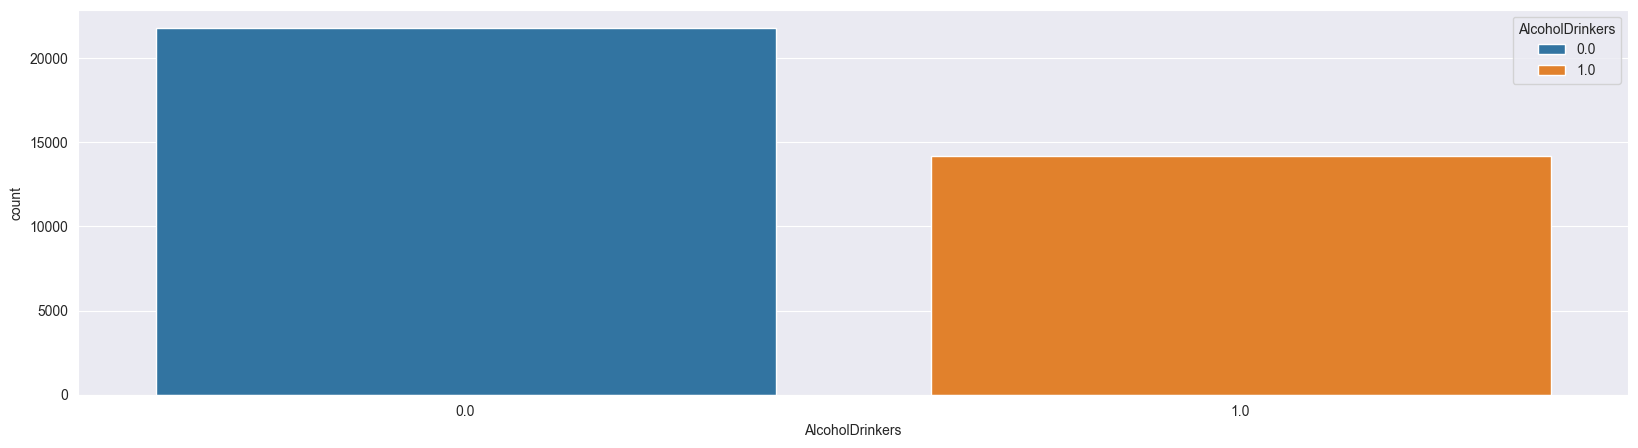

In [268]:
sns.countplot(data=df_heartdisease, x="AlcoholDrinkers", hue="AlcoholDrinkers")
plt.show()

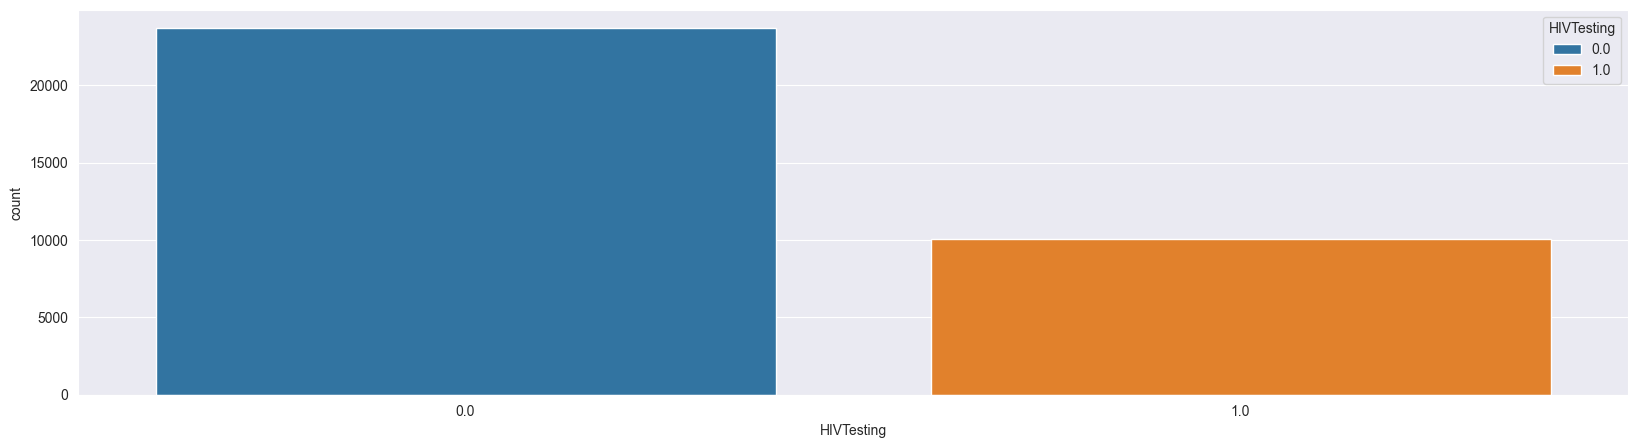

In [270]:
sns.countplot(data=df_heartdisease, x="HIVTesting", hue="HIVTesting")
plt.show()

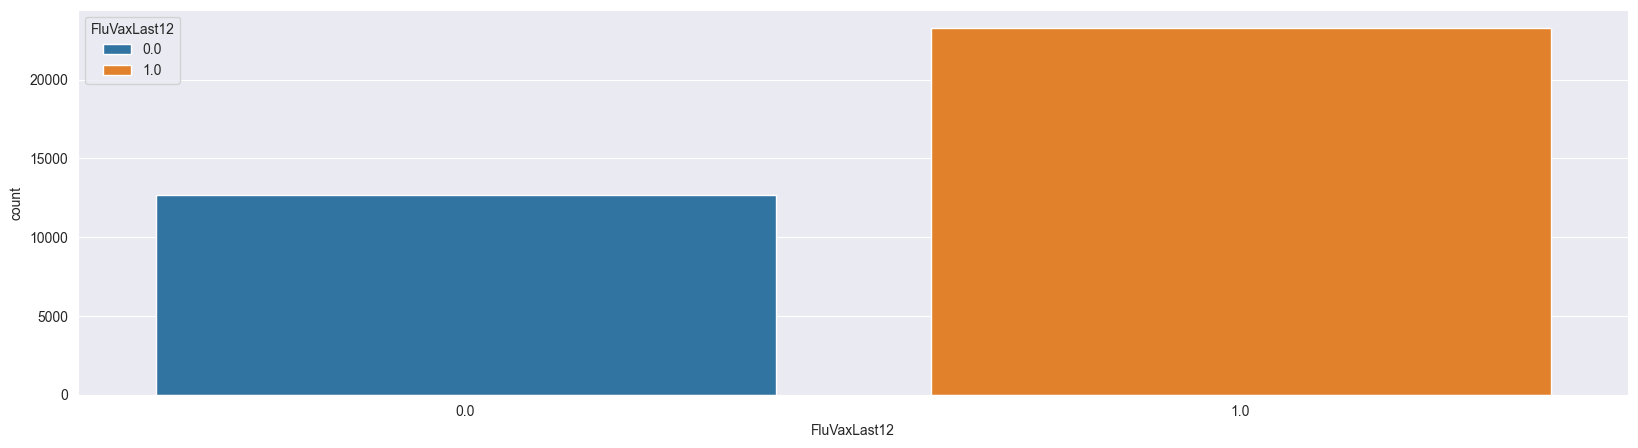

In [271]:
sns.countplot(data=df_heartdisease, x="FluVaxLast12", hue="FluVaxLast12")
plt.show()

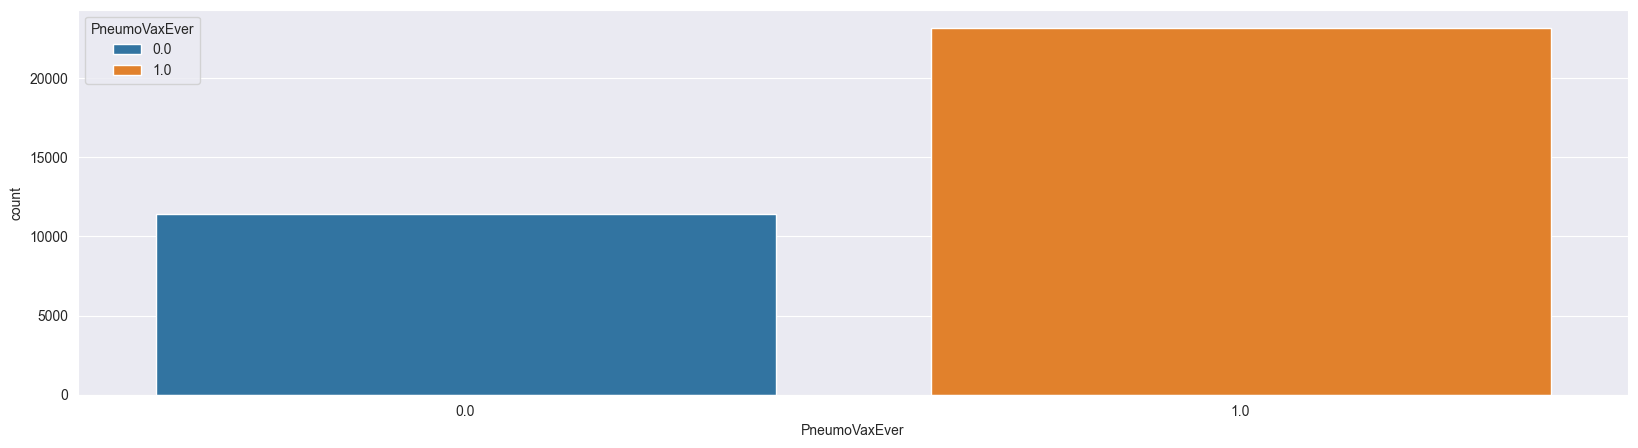

In [272]:
sns.countplot(data=df_heartdisease, x="PneumoVaxEver", hue="PneumoVaxEver")
plt.show()

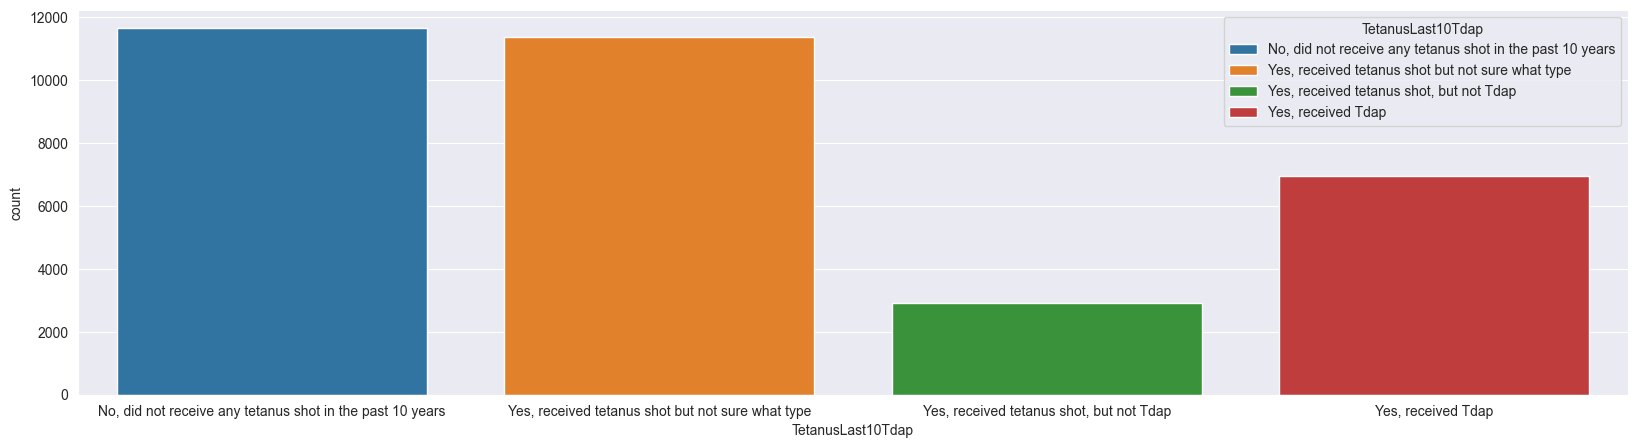

In [273]:
sns.countplot(data=df_heartdisease, x="TetanusLast10Tdap", hue="TetanusLast10Tdap")
plt.show()

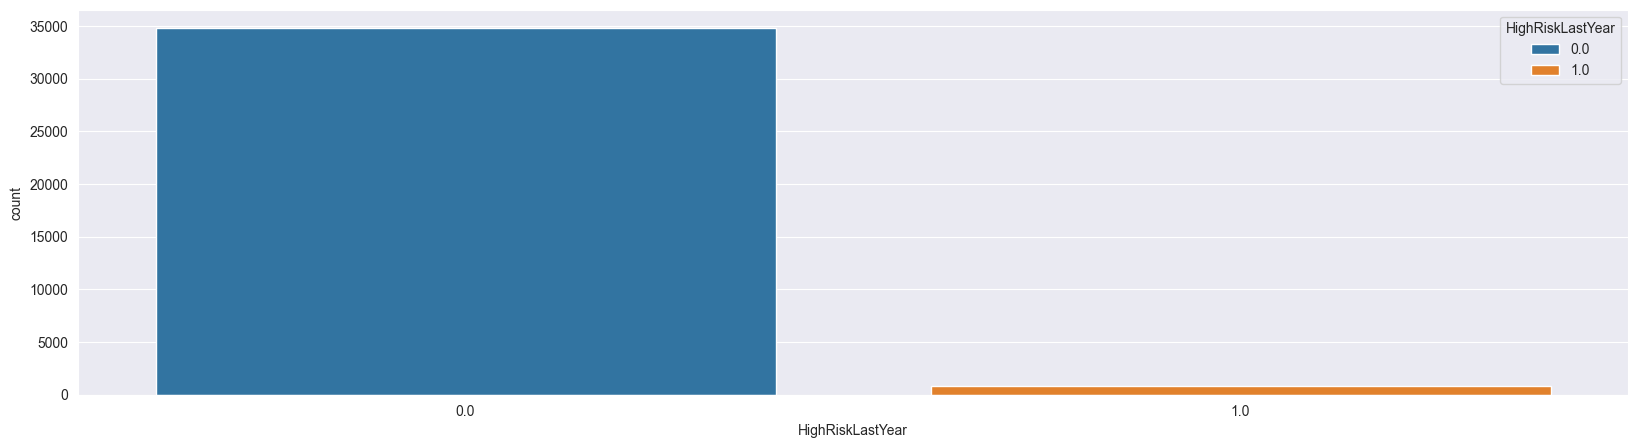

In [274]:
sns.countplot(data=df_heartdisease, x="HighRiskLastYear", hue="HighRiskLastYear")
plt.show()

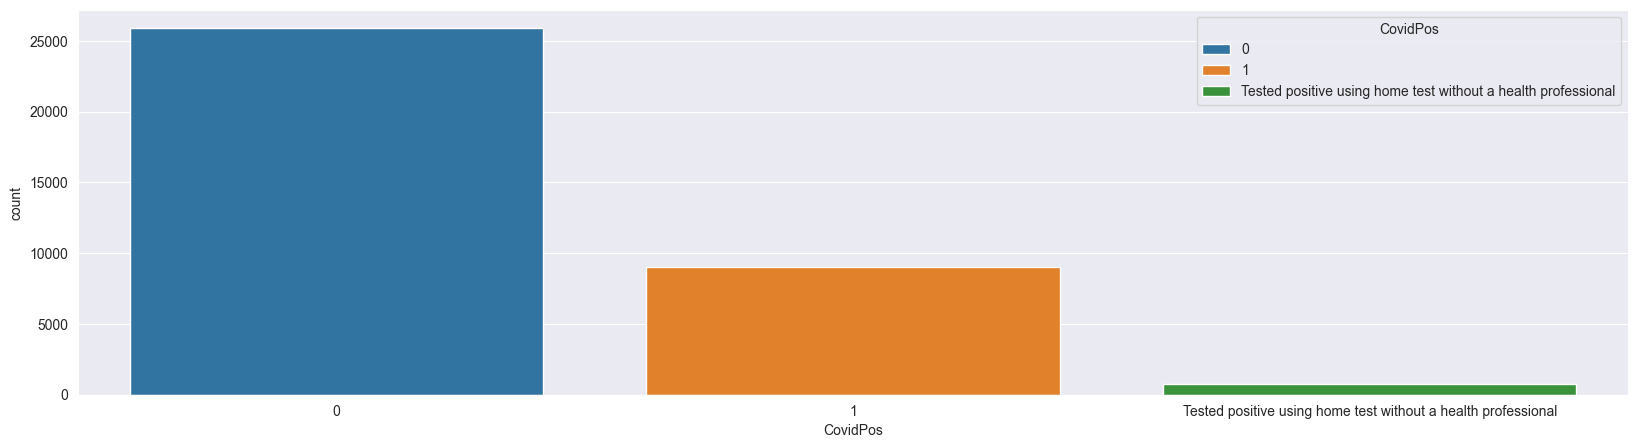

In [275]:
sns.countplot(data=df_heartdisease, x="CovidPos", hue="CovidPos")
#plt.show()

<Axes: >

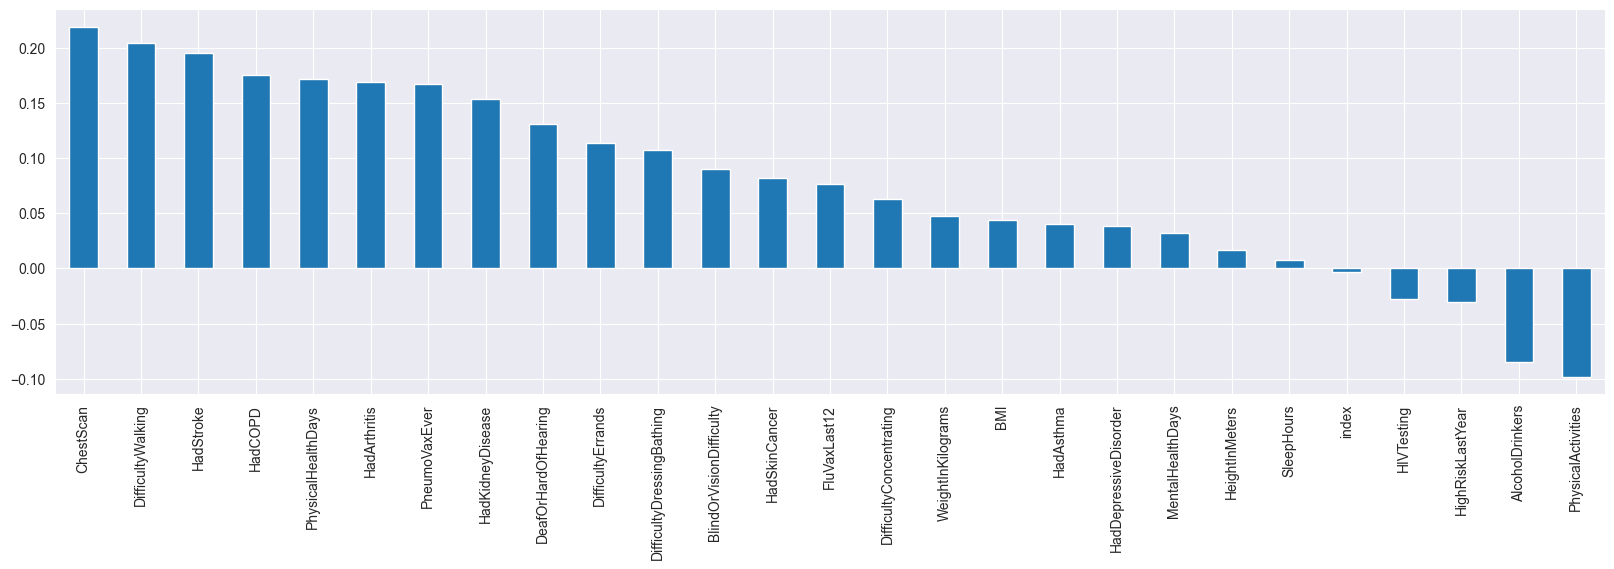

In [328]:
#What are we trying to identify with our linear pearson correlation 

#We had created a column which was called Heart Disease, based on whether someone had Angina and Heart Attack

correlate_df = t3.select_dtypes(include='number') #We only want to include the numeric columns

#We have sorted our correlation values in descending order meaning the values with the strongest correlations (highest) are at the top of the 
correlate_df.corr()['HeartDiseasePresence'].sort_values(ascending=False)[3:].plot(kind='bar')

# correlated_df = df_heartdisease.corr(method='pearson', numeric_only=True)
# sns.heatmap(correlated_df,annot=True)